# Анализ рынка компьтерных игр

**Описание исследования**   
Сделать анализ данных рынка компьютерных игр до 2016 года включительно для маркетингового отдела компании перед построением стратегии на будущий 2017 год. 

**Цель исследования**  
Выявить определяющие успешность игры закономерности, чтобы сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

**Задачи исследования.**   
- подготовить даные к анализу;
- проанализировать выпуск игр по годам;
- проанализировать продажи по разным платформам;
- проанализировать влияние отзывов пользователей и критиков на продажи игр на платформах;
- проанализировать игры по жанрам;
- составить портрет пользователя каждого региона;
- проверить 2 гипотезы.

**СОДЕРЖАНИЕ**   

[Часть 1. Подготовка данных](#section_1)   
[Часть 2. Исследовательский анализ данных](#section_2)   
[Часть 3. Портрет пользователя по регионам](#section_3)   
[Часть 4. Проверка гипотез](#section_4)   
[Часть 5. Общий вывод](#section_5)

**Часть 1. Подготовка данных**
<a id='section_1'></a>

Открываем, ознакамливаемся.

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import statistics as stat
import numpy as np
import math
from scipy import stats as st
import seaborn as sns
from pylab import rcParams
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('_.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Приводим название столбцов к нижнему регистру.

In [2]:
df.columns = df.columns.str.lower()
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Работаем над пропусками и типом данных. Преобразуем год релиза в целочисленное значение.  

In [3]:
df.dropna(subset = ['year_of_release'], inplace=True)
df['year_of_release'] = df['year_of_release'].astype('int64')

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


В двух строках нет имени и в двух строках нет жанра. Незначительная часть от общего массива, можно удалить.

In [4]:
df = df.dropna(subset = ['name', 'genre'])

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


В оценках как критиков, так и пользователей очень много пропусков. Удалить такую значительную часть массива данных не представляется возможным. Если в течение долгого времени никто не оценил игру, то её рейтинг равен 0.

*Почему могли возникнуть пропуски?*  
В названии и жанре - эти строки могли возникнуть при тестировании системы сбора информации, например. 
В году выпуска - возможно выходили новые редакции уже существующих игр и их вписывали в отдельные строки.  
В оценках пользователей и критиков - не все пользователи и критики оценивают все вышедшие игры.  
В рейтинге - рейтинг представлен только от одной организации, возможно одна организация не способна охватить весь рынок.

*tbd в столбце user_score*

In [5]:
df[df['user_score']=='tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
718,Just Dance Kids,Wii,2010,Misc,1.52,0.54,0.0,0.18,NaN,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


Всемогущий интернет сказал, что tbd - это To Be Determined, т.е. рейтинг только предстоит определить. Таковых значений 2 376, что составляет около 15%. Удалить не можем. Заменим на нули, т.к. если, например, с 2010 года никто не определил рейтинг игры, навряд ли его впредь определят.

In [6]:
df['user_score'] = df['user_score'].replace('tbd', 0)
df['user_score'] = df['user_score'].astype('float64')

In [7]:
columns = ['user_score', 'critic_score', 'rating']

In [8]:
columns = ['user_score', 'critic_score', 'rating']

for i in columns:
    df[i] = df[i].fillna(0)

*Столбец с суммарными продажами во всех регионах.*

In [9]:
df['all_sales'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0.0,0.0,0,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0.0,0.0,0,31.38


**Часть 2. Исследовательский анализ данных**
<a id='section_2'></a>

2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
2012     653
2015     606
2014     581
2013     544
2016     502
2001     482
1998     379
2000     350
1999     338
1997     289
1996     263
1995     219
1994     121
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1989      17
1983      17
1990      16
1987      16
1988      15
1985      14
1984      14
1980       9
Name: year_of_release, dtype: int64

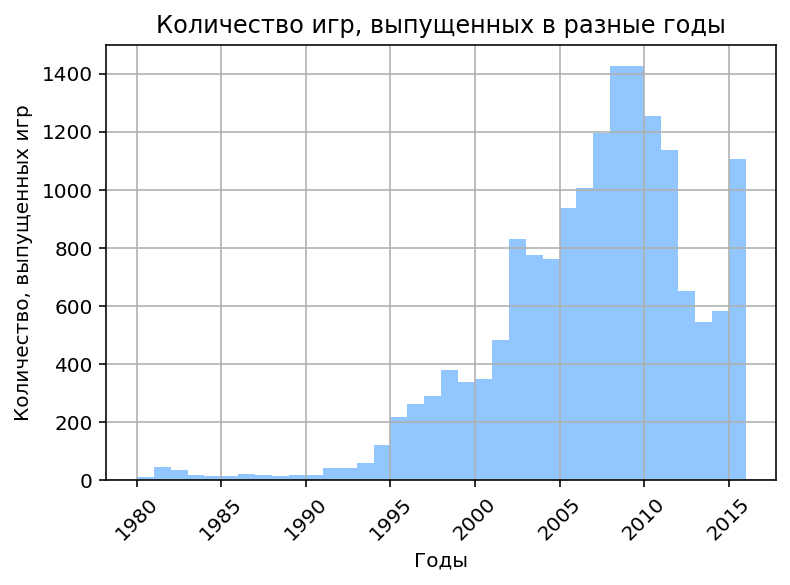

In [10]:
display(df['year_of_release'].value_counts())

%config InlineBackend.figure_format = 'retina'
matplotlib.style.use('seaborn-pastel')

df['year_of_release'].plot(kind='hist', bins=36, grid=True, rot=45)
plt.title('Количество игр, выпущенных в разные годы')
plt.xlabel('Годы')
plt.ylabel('Количество, выпущенных игр')
plt.show()

df[df['year_of_release'] < 2000]['year_of_release'].count()
df_2000 = df[df['year_of_release'] >= 2000]

Чтобы выбрка оставалась достаточно большой для дальнейшего анализа можно в дальнейшем брать только данные о рынке компьютерных игр с 2000 года. Первые 20 лет рынок только формировался, и в течение этих лет было выпущено всего 12% игр от общего числа релизов.

In [11]:
top_platforms = df_2000['platform'].value_counts().sort_values(ascending = False).head(5).index.values
top_platforms

array(['PS2', 'DS', 'PS3', 'Wii', 'X360'], dtype=object)

In [12]:
df_2000_top = df_2000[df_2000['platform'].isin(top_platforms)].loc[:, ['platform', 'year_of_release']]

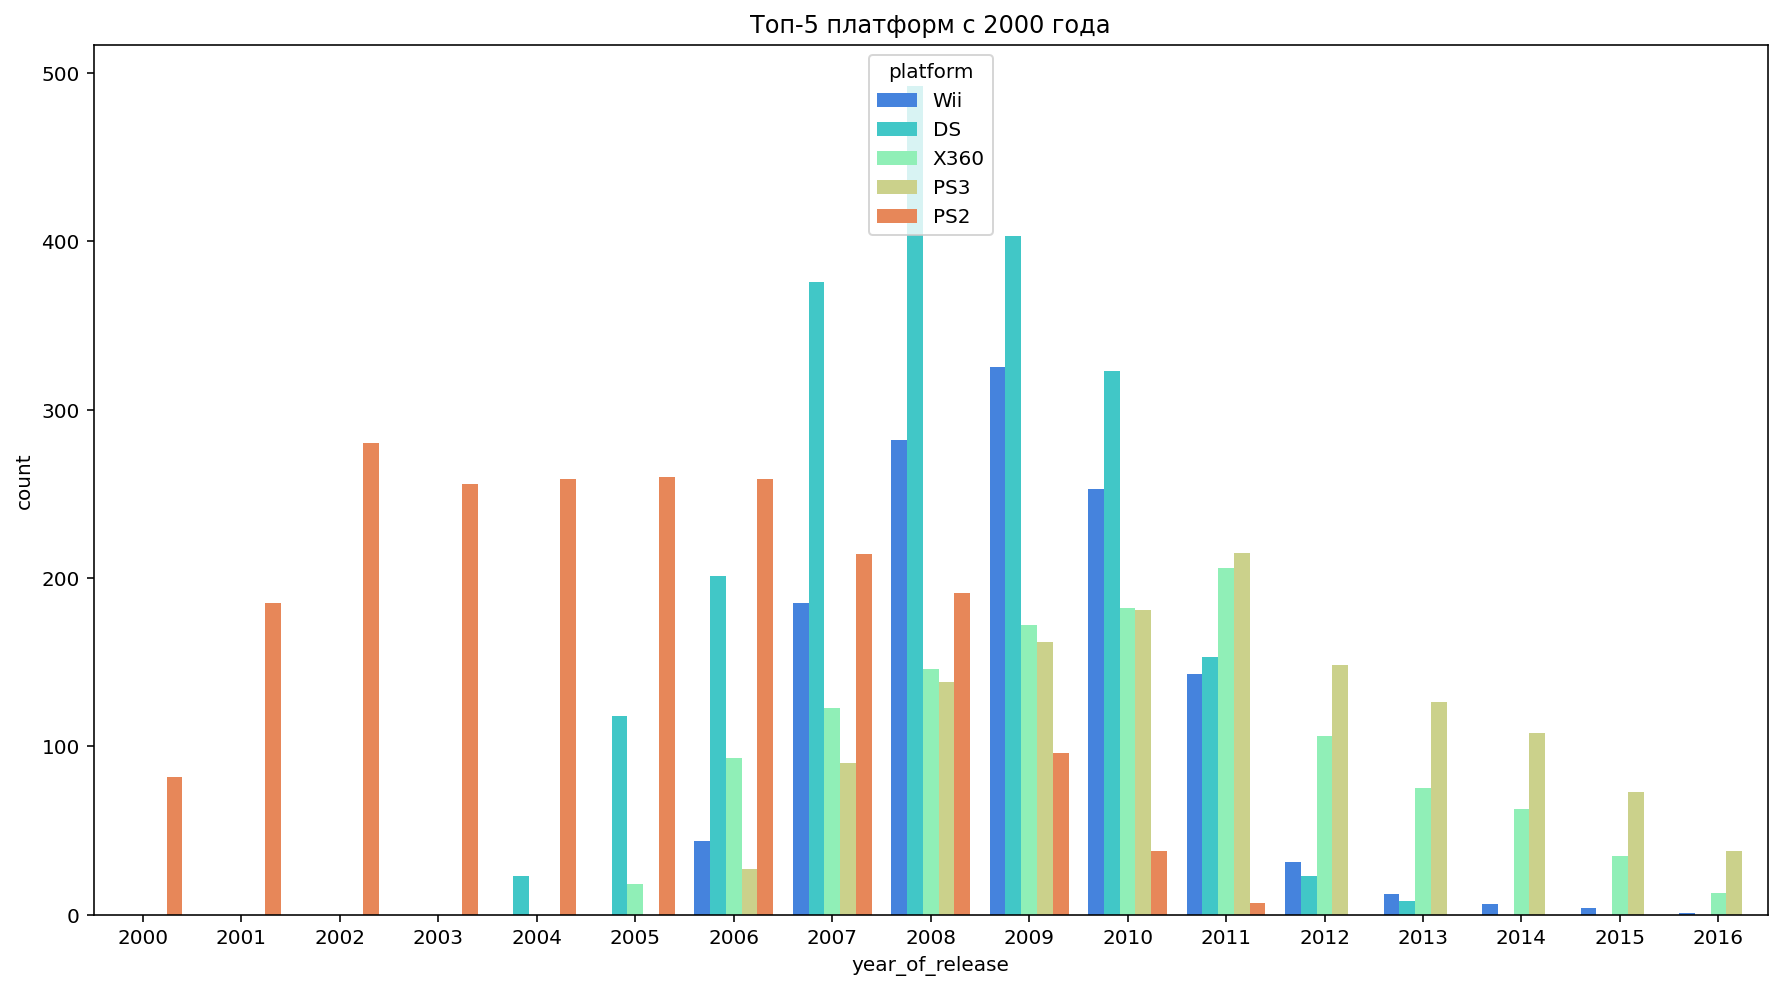

In [42]:
plt.figure(figsize=(15,8))
sns.countplot(x='year_of_release', 
            hue='platform', 
            data=df_2000_top, 
            palette='rainbow');

plt.title('Топ-5 платформ с 2000 года')
plt.show()

В среднем срок жизни платформы на рынке игр составляет 9-10 лет от первого релиза до последнего.

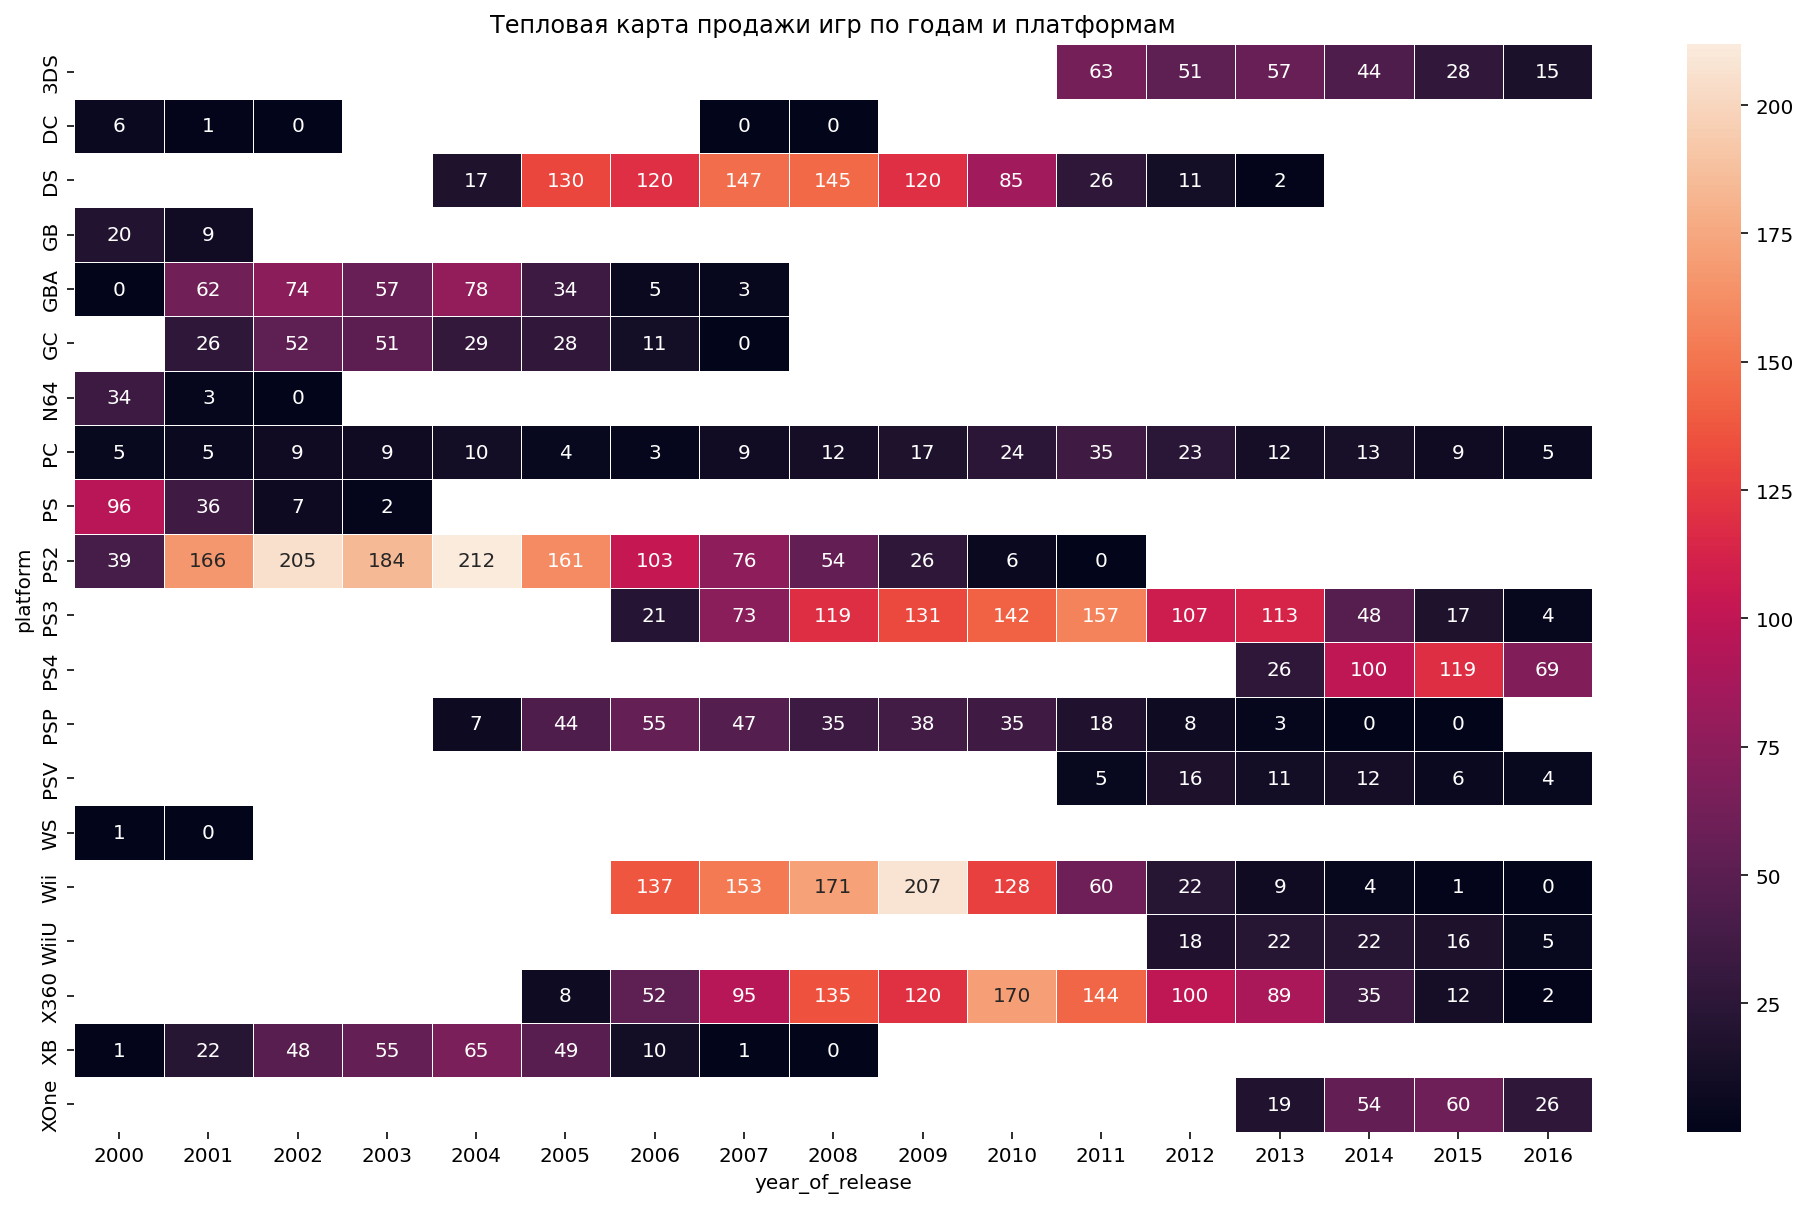

In [41]:
sales_df_2000 = df_2000.pivot_table(
                            index='platform',
                            columns = 'year_of_release',
                            values = 'all_sales',
                            aggfunc='sum'
)
plt.figure(figsize=(17,10))
sns.heatmap(sales_df_2000, annot=True, fmt=".0f", linewidths=.5);
plt.title('Тепловая карта продажи игр по годам и платформам')
plt.show()

В 2016 году лидером по общим продажам стала платформа PS4. В предыдущем пункте на основе прошедших лет мы сделали вывод, что средний срок жизненного цикла платформы на рынке 9-10 лет. Первый релиз PS4 был в 2013 году, из чего следует, что и в 2017 её не стоит сбрасывать со счетов.   
Также на пик своей продуктивности может в ближайшее время выйти XOne (данные за 2016 год могут быть неполными, а к 2015 году была тенденция к росту).   
У компаний WiiU и PSV нет тенденций к росту к 2015 году, поэтому нужно больше данных для вывода о перспективности этих компаний. Хотя исходя из теории 10-летнего жизненного цикла - эти платформы перспективны.  
На фоне результатов других платформ привлекательной выглядит 3DC. Эта платформа будет прибыльной ещё некоторое время, хотя пик уже пройден.  
Отрасль не пришла к прежним объёмам после мирового кризиса 2008 года.

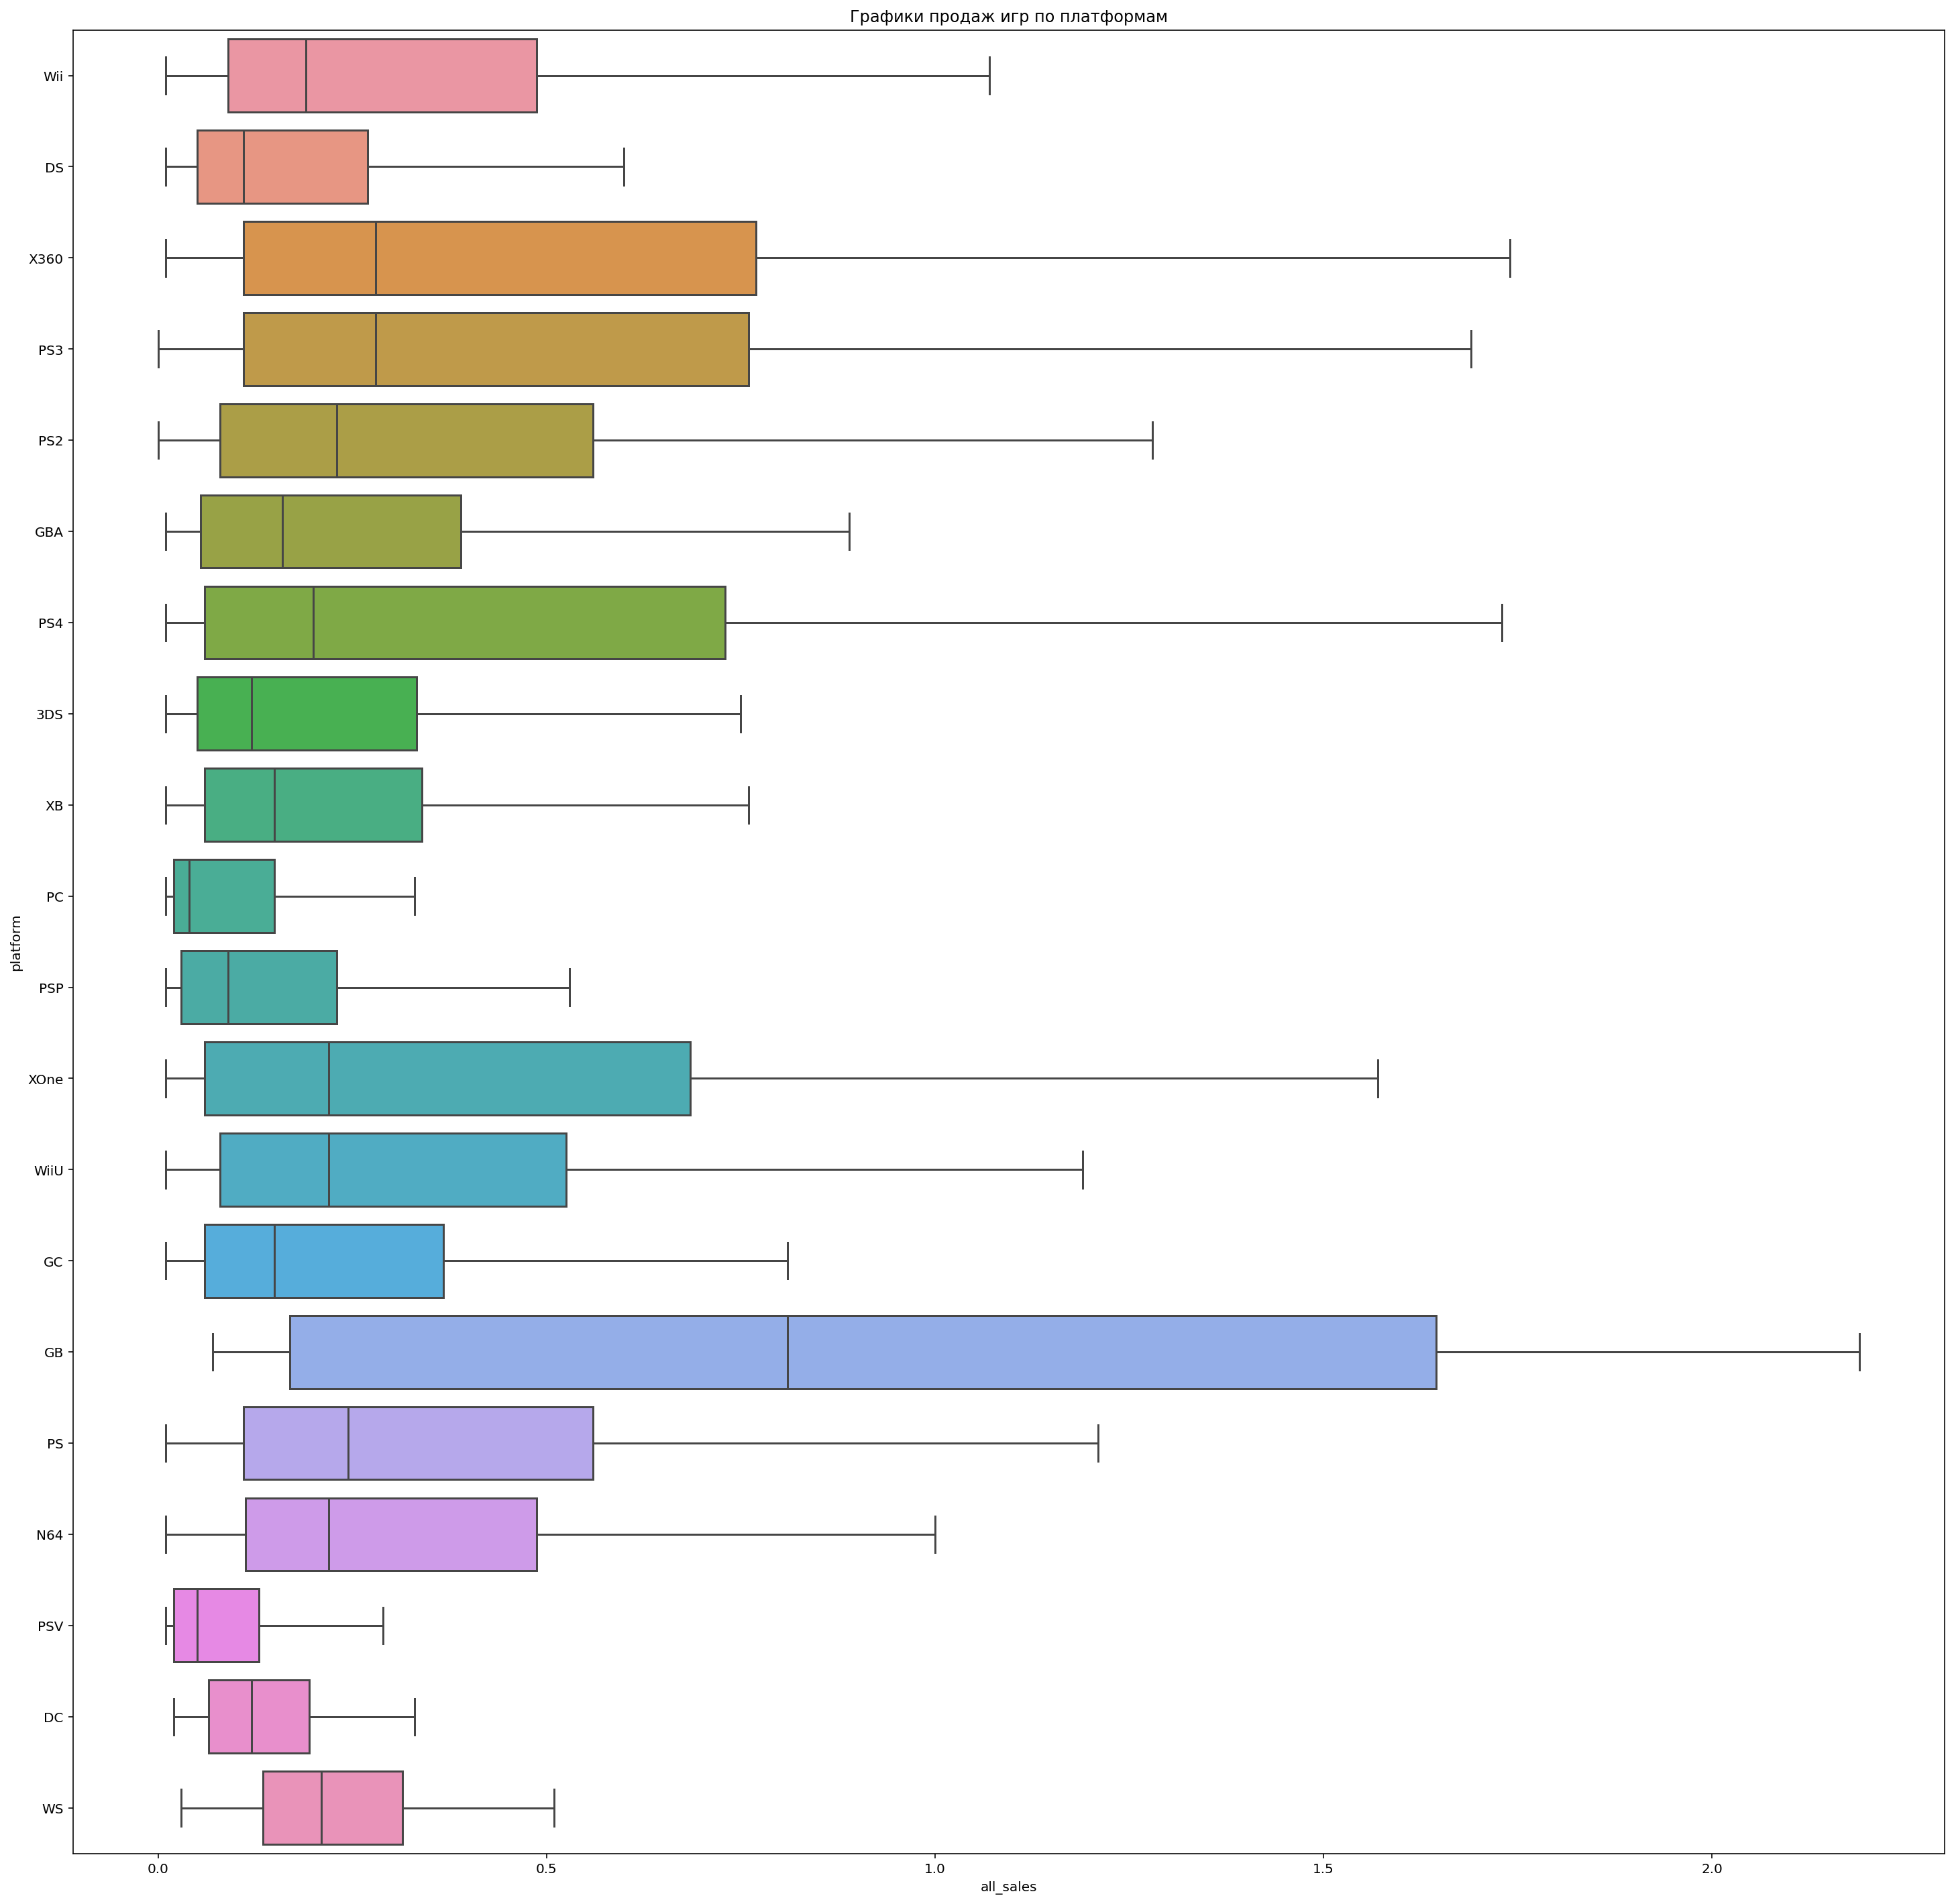

In [44]:
plt.figure(figsize=(25,25))
sns.boxplot(y='platform', x='all_sales', data=df_2000, showfliers=False);
plt.title('Графики продаж игр по платформам')
plt.show()

График ящика с усами показывает, что у каждой платформы есть выбросы по продажам, т.к. на графиках до этого мы видели, что жизненный цикл платформы на рынке игр предполагает что после примерно 5 лет на рынке будет пик, и затем спад. Сильнее всех в этом плане выстрелила платформа Wii в 2009 году.

Платформа, которая держится на рынке весь анализируемый период - PC. Её и возьмём для анализа влияния оценок пользователей и критиков.

In [17]:
df_2000_pc = df_2000[df_2000['platform'] == "PC"]
df_2000_pc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 917 entries, 85 to 16705
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             917 non-null    object 
 1   platform         917 non-null    object 
 2   year_of_release  917 non-null    int64  
 3   genre            917 non-null    object 
 4   na_sales         917 non-null    float64
 5   eu_sales         917 non-null    float64
 6   jp_sales         917 non-null    float64
 7   other_sales      917 non-null    float64
 8   critic_score     917 non-null    float64
 9   user_score       917 non-null    float64
 10  rating           917 non-null    object 
 11  all_sales        917 non-null    float64
dtypes: float64(7), int64(1), object(4)
memory usage: 93.1+ KB


Если критики и пользователи до сих пор не оценили игру, значит рейтинг = 0.

In [18]:
df_2000_pc['user_score'] = df_2000_pc['user_score'].fillna(0).astype('float64')
df_2000_pc['critic_score'] = df_2000_pc['critic_score'].fillna(0)
df_2000_pc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 917 entries, 85 to 16705
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             917 non-null    object 
 1   platform         917 non-null    object 
 2   year_of_release  917 non-null    int64  
 3   genre            917 non-null    object 
 4   na_sales         917 non-null    float64
 5   eu_sales         917 non-null    float64
 6   jp_sales         917 non-null    float64
 7   other_sales      917 non-null    float64
 8   critic_score     917 non-null    float64
 9   user_score       917 non-null    float64
 10  rating           917 non-null    object 
 11  all_sales        917 non-null    float64
dtypes: float64(7), int64(1), object(4)
memory usage: 93.1+ KB


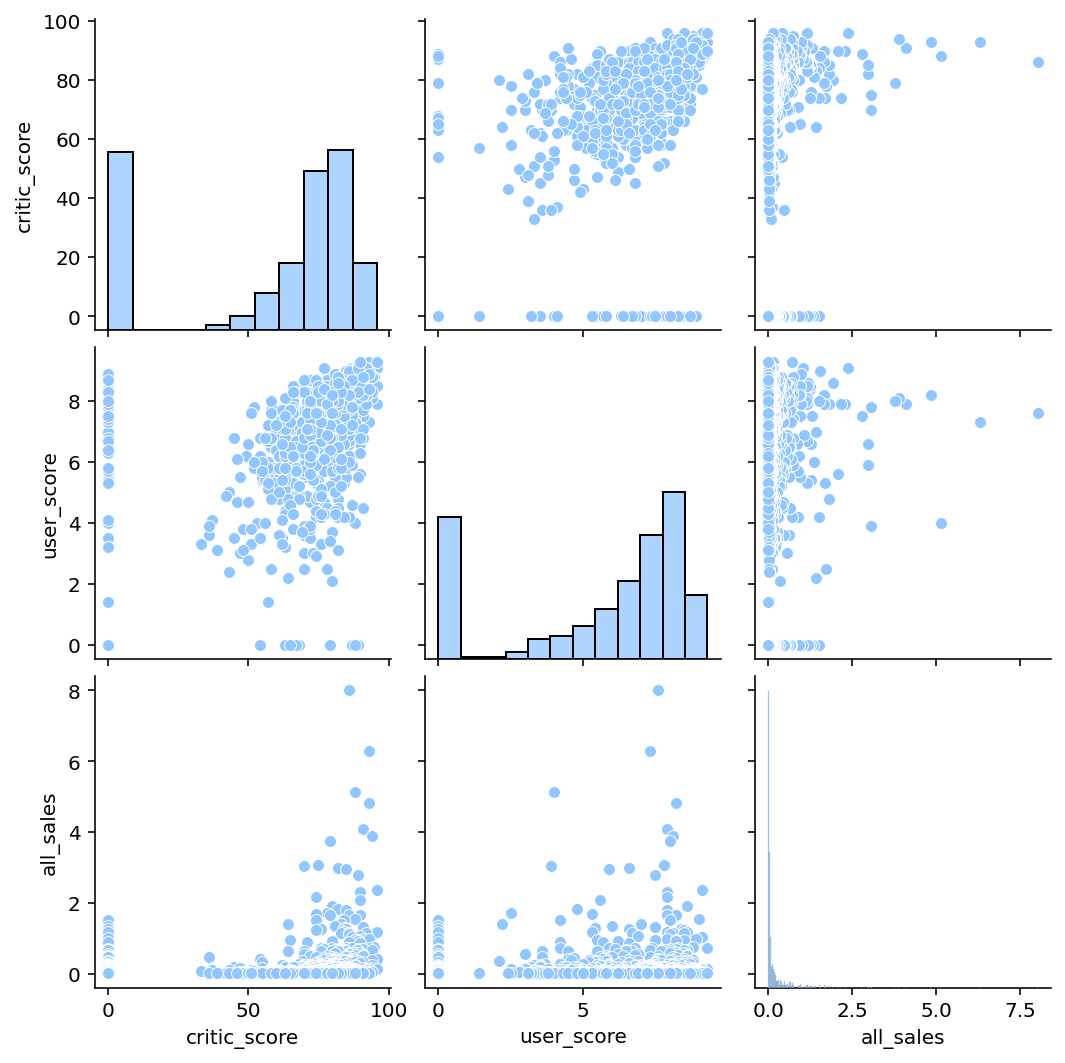

In [46]:
sns.pairplot(df_2000_pc.loc[:, ['critic_score', 'user_score', 'all_sales']]);

In [20]:
df_2000_pc.loc[:, ['critic_score', 'user_score', 'all_sales']].corr()

,critic_score,user_score,all_sales
critic_score,1.000000,0.753268,0.185882
user_score,0.753268,1.000000,0.091597
all_sales,0.185882,0.091597,1.000000


Из матрицы корреляций можно сделать следующие выводы: связь между оценкой как критиков, так и оценкой пользователей и продажами платформы слабая. Это же отображает график рассеивания. 

In [21]:
df_2000.loc[:, ['platform', 'all_sales', 'critic_score']].groupby('platform').corr()

all_sales  critic_score
platform                                      
3DS      all_sales      1.000000      0.167021
         critic_score   0.167021      1.000000
DC       all_sales      1.000000     -0.001789
         critic_score  -0.001789      1.000000
DS       all_sales      1.000000      0.159175
         critic_score   0.159175      1.000000
GB       all_sales      1.000000           NaN
         critic_score        NaN           NaN
GBA      all_sales      1.000000      0.038685
         critic_score   0.038685      1.000000
GC       all_sales      1.000000      0.182080
         critic_score   0.182080      1.000000
N64      all_sales      1.000000           NaN
         critic_score        NaN           NaN
PC       all_sales      1.000000      0.185882
         critic_score   0.185882      1.000000
PS       all_sales      1.000000      0.200528
         critic_score   0.200528      1.000000
PS2      all_sales      1.000000      0.300953
         critic_score   0.300953      1.000000
PS3      all_sales      1.000000      0.355146
         critic_score   0.355146      1.000000
PS4      all_sales      1.000000      0.227550
         critic_score   0.227550      1.000000
PSP      all_sales      1.000000      0.334269
         critic_score   0.334269      1.000000
PSV      all_sales      1.000000      0.403397
         critic_score   0.403397      1.000000
WS       all_sales      1.000000           NaN
         critic_score        NaN           NaN
Wii      all_sales      1.000000      0.188944
         critic_score   0.188944      1.000000
WiiU     all_sales      1.000000      0.298124
         critic_score   0.298124      1.000000
X360     all_sales      1.000000      0.311756
         critic_score   0.311756      1.000000
XB       all_sales      1.000000      0.225038
         critic_score   0.225038      1.000000
XOne     all_sales      1.000000      0.274839
         critic_score   0.274839      1.000000

Если рассматривать матрицу корреляции между оценкой критиков и продажами, то нет ни одного коэффициента ни на одной платформе, который был бы значим, что подтверждает выводы предыдущего пункта.

In [22]:
df_2000.loc[:, ['platform','user_score', 'all_sales']].groupby('platform').corr()

user_score  all_sales
platform                                  
3DS      user_score    1.000000   0.150053
         all_sales     0.150053   1.000000
DC       user_score    1.000000  -0.064897
         all_sales    -0.064897   1.000000
DS       user_score    1.000000   0.187718
         all_sales     0.187718   1.000000
GB       user_score         NaN        NaN
         all_sales          NaN   1.000000
GBA      user_score    1.000000   0.130792
         all_sales     0.130792   1.000000
GC       user_score    1.000000   0.223326
         all_sales     0.223326   1.000000
N64      user_score         NaN        NaN
         all_sales          NaN   1.000000
PC       user_score    1.000000   0.091597
         all_sales     0.091597   1.000000
PS       user_score    1.000000   0.242929
         all_sales     0.242929   1.000000
PS2      user_score    1.000000   0.263918
         all_sales     0.263918   1.000000
PS3      user_score    1.000000   0.274583
         all_sales     0.274583   1.000000
PS4      user_score    1.000000   0.113116
         all_sales     0.113116   1.000000
PSP      user_score    1.000000   0.347825
         all_sales     0.347825   1.000000
PSV      user_score    1.000000   0.376902
         all_sales     0.376902   1.000000
WS       user_score         NaN        NaN
         all_sales          NaN   1.000000
Wii      user_score    1.000000   0.184527
         all_sales     0.184527   1.000000
WiiU     user_score    1.000000   0.271140
         all_sales     0.271140   1.000000
X360     user_score    1.000000   0.207806
         all_sales     0.207806   1.000000
XB       user_score    1.000000   0.219346
         all_sales     0.219346   1.000000
XOne     user_score    1.000000   0.116563
         all_sales     0.116563   1.000000

Выводы по оценка пользователей абсолютно аналогичны: нет связи между продажами и оценкой пользователей.

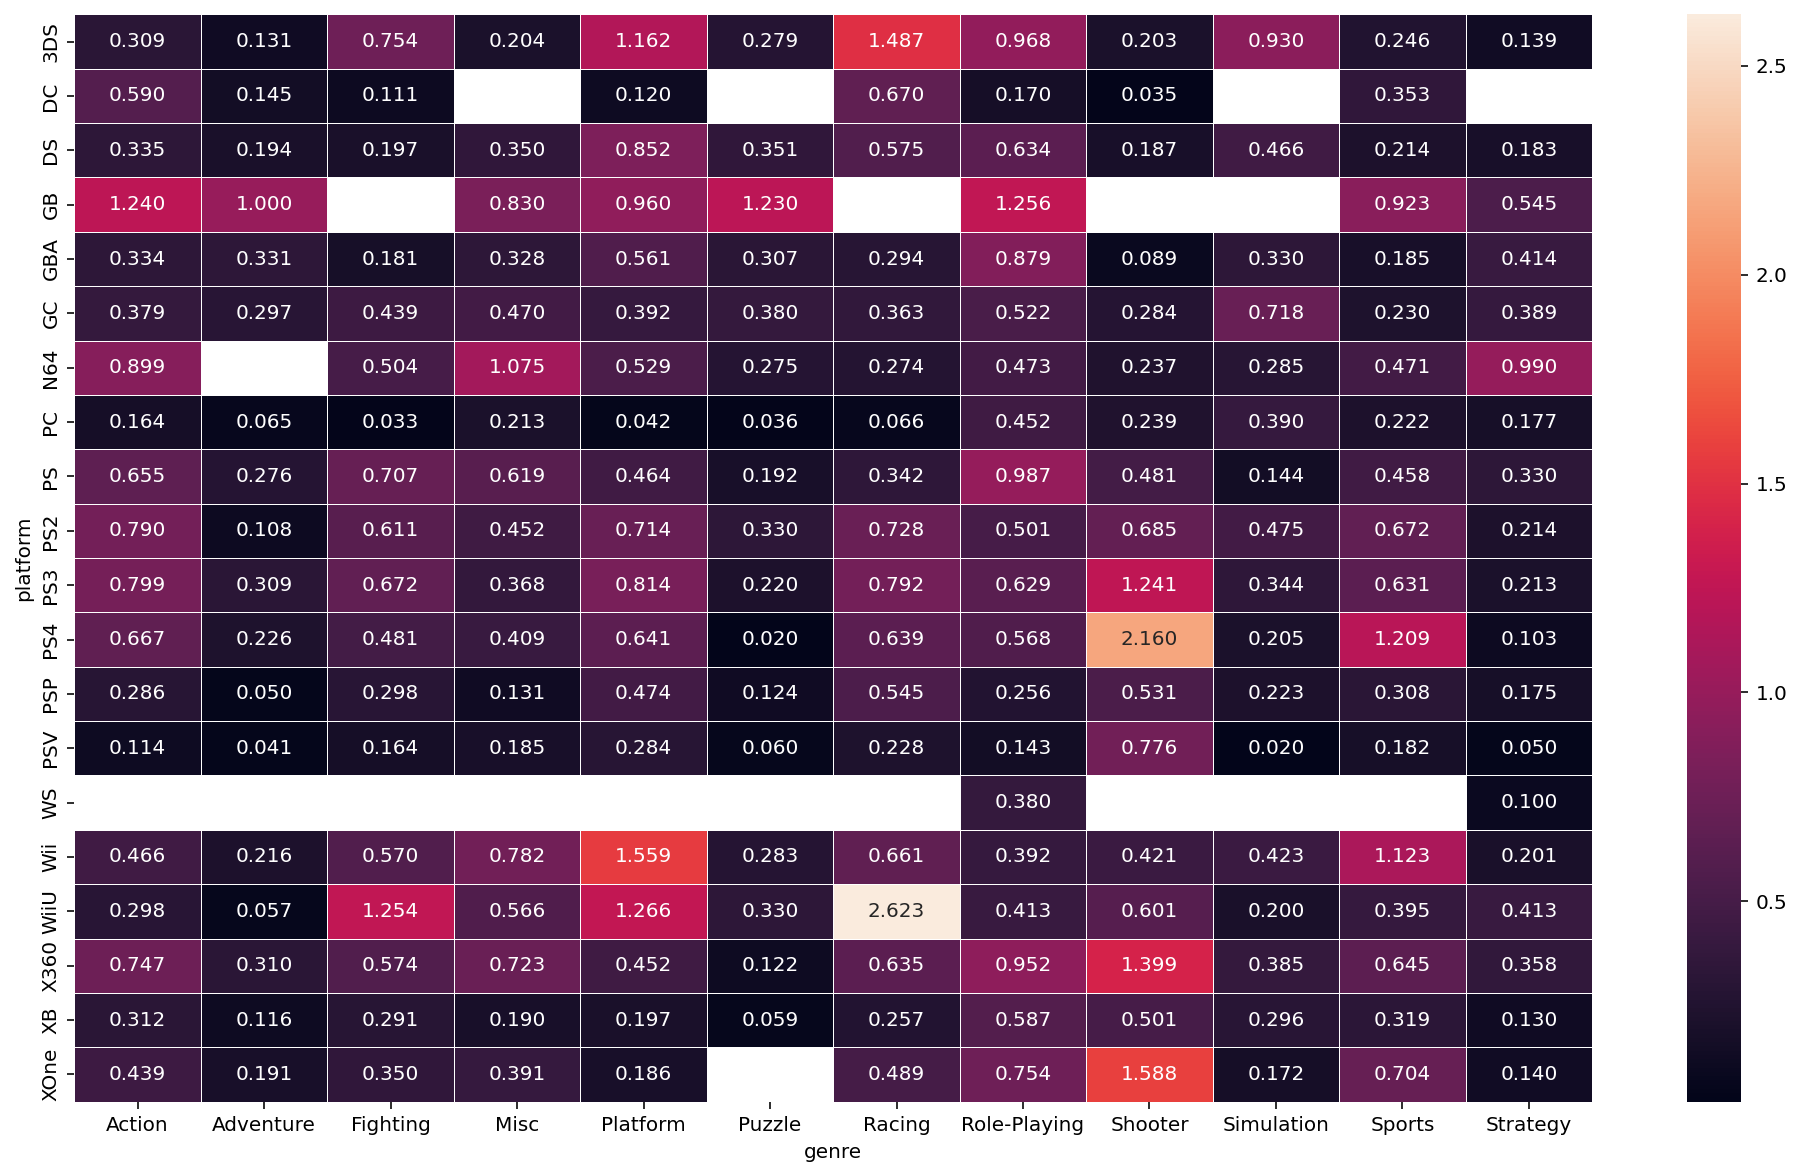

In [25]:
genre_df_2000 = df_2000.pivot_table(
                            index='platform',
                            columns = 'genre',
                            values = 'all_sales',
                            aggfunc = 'mean'
)
plt.figure(figsize=(17,10))
sns.heatmap(genre_df_2000, annot=True, fmt=".3f", linewidths=.5);

По средней прибыли вперёд вырываются Racing и Shooter.

**Часть 3. Портрет пользователя по регионам**
<a id='section_3'></a>

In [26]:
rcParams['figure.figsize'] = 15,10

In [27]:
na_sales_df_2000 = df_2000.loc[:, ['platform', 'na_sales']]
na_sales_df_2000_chart = na_sales_df_2000.pivot_table(index='platform', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending = False)
eu_sales_df_2000 = df_2000.loc[:, ['platform', 'eu_sales']]
eu_sales_df_2000_chart = eu_sales_df_2000.pivot_table(index='platform', values= 'eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending = False)
jp_sales_df_2000 = df_2000.loc[:, ['platform', 'jp_sales']]
jp_sales_df_2000_chart = jp_sales_df_2000.pivot_table(index='platform', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending = False)

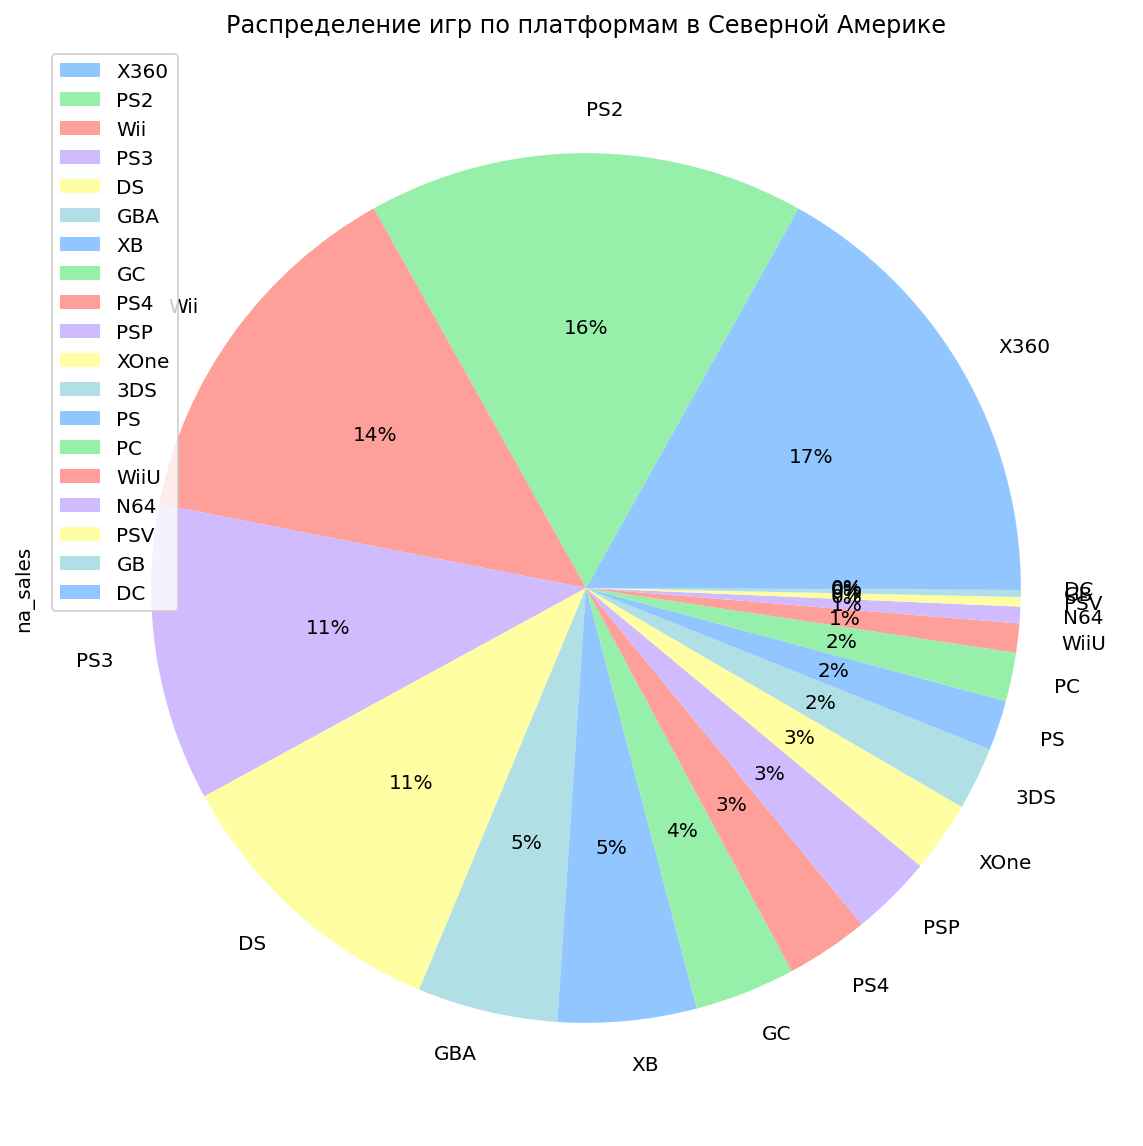

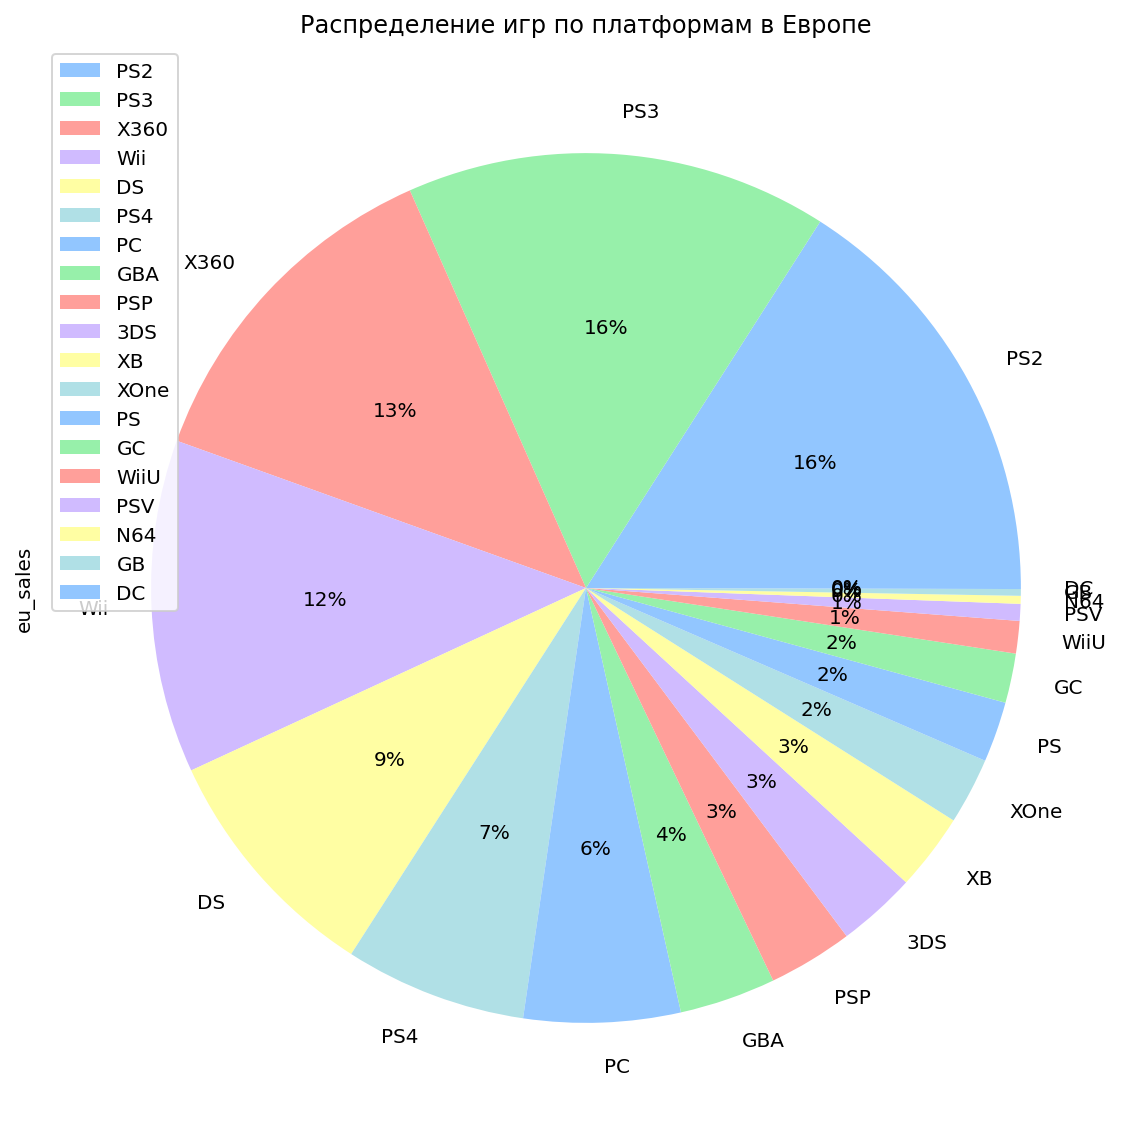

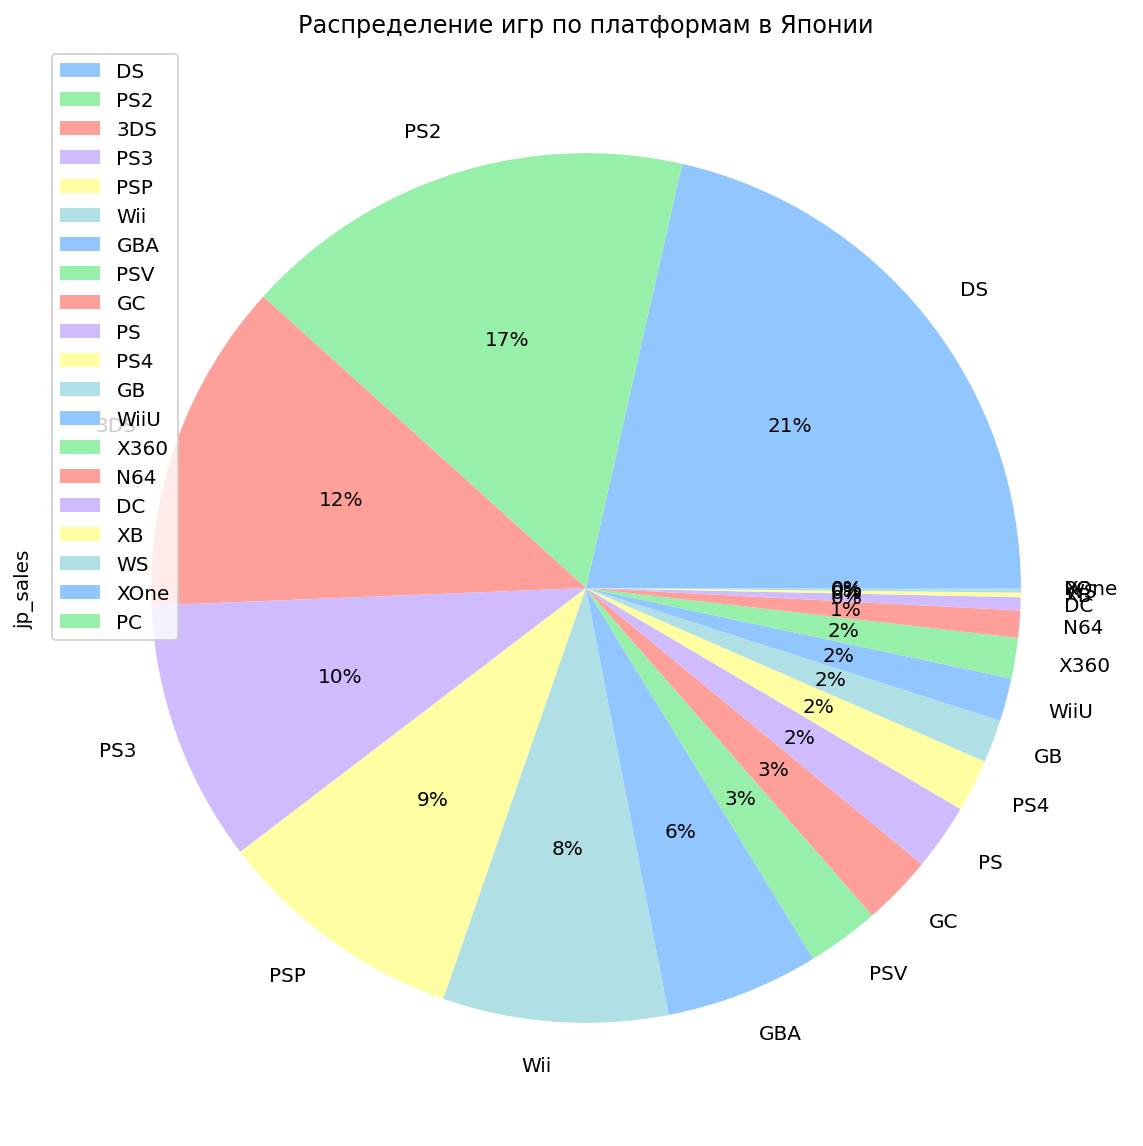

In [57]:
ax1 = na_sales_df_2000_chart.plot(kind='pie', autopct='%1.0f%%', subplots=True)
plt.title('Распределение игр по платформам в Северной Америке')

ax2 = eu_sales_df_2000_chart.plot(kind='pie', autopct='%1.0f%%', subplots=True)
plt.title('Распределение игр по платформам в Европе')

ax3 = jp_sales_df_2000_chart.plot(kind='pie', autopct='%1.0f%%', subplots=True)
plt.title('Распределение игр по платформам в Японии');

Из графиков можно сделать следующие выводы:     
- Северная Америка Топ-5: X360, PS2, Wii, PS3, DS;   
- Европа Топ-5: PS2, PS3, X360, Wii, DS;
- Япония Топ-5: DS, PS2, 3DS, PS3, PSP;   
Топы в Америка и Европе совпадают по составу, но различаются по последовательности. В этих же двух регионах примерно совпадают доли в распределении первых мест.    
В Японии же лидерство с уверенным отрывом захватывает DS, который в других регионах занимает пятое место. Википедия помогает развенчать этот феномен: DS - платформа японского производства.

In [29]:
na_genre_df_2000 = df_2000.loc[:, ['na_sales', 'genre']]
na_genre_df_2000_chart = na_genre_df_2000.pivot_table(index='genre', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending = False)
eu_genre_df_2000 = df_2000.loc[:, ['genre', 'eu_sales']]
eu_genre_df_2000_chart = eu_genre_df_2000.pivot_table(index='genre', values= 'eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending = False)
jp_genre_df_2000 = df_2000.loc[:, ['genre', 'jp_sales']]
jp_genre_df_2000_chart = jp_genre_df_2000.pivot_table(index='genre', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending = False)

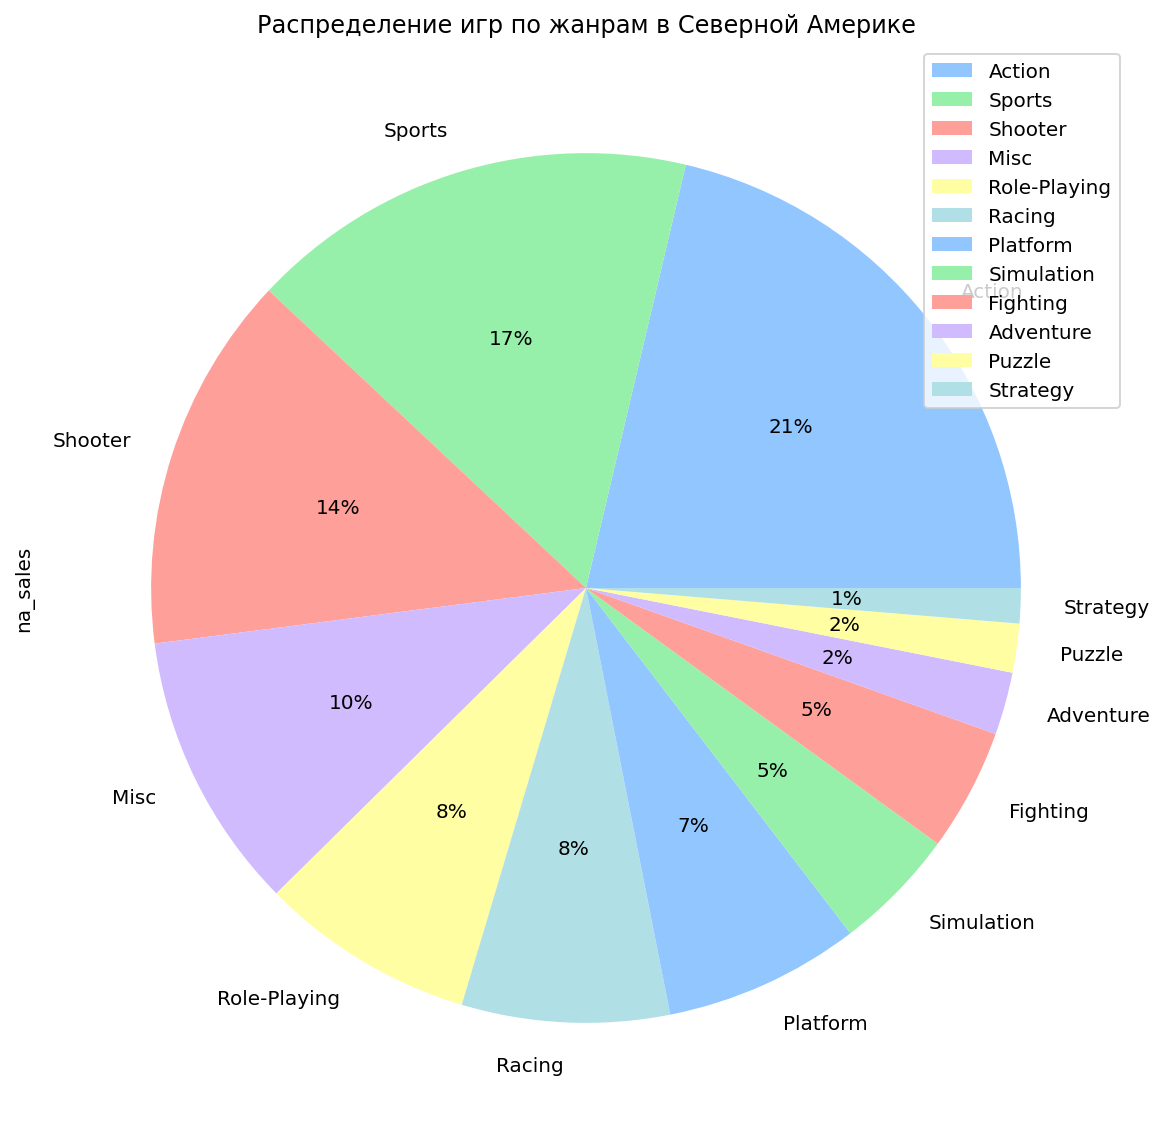

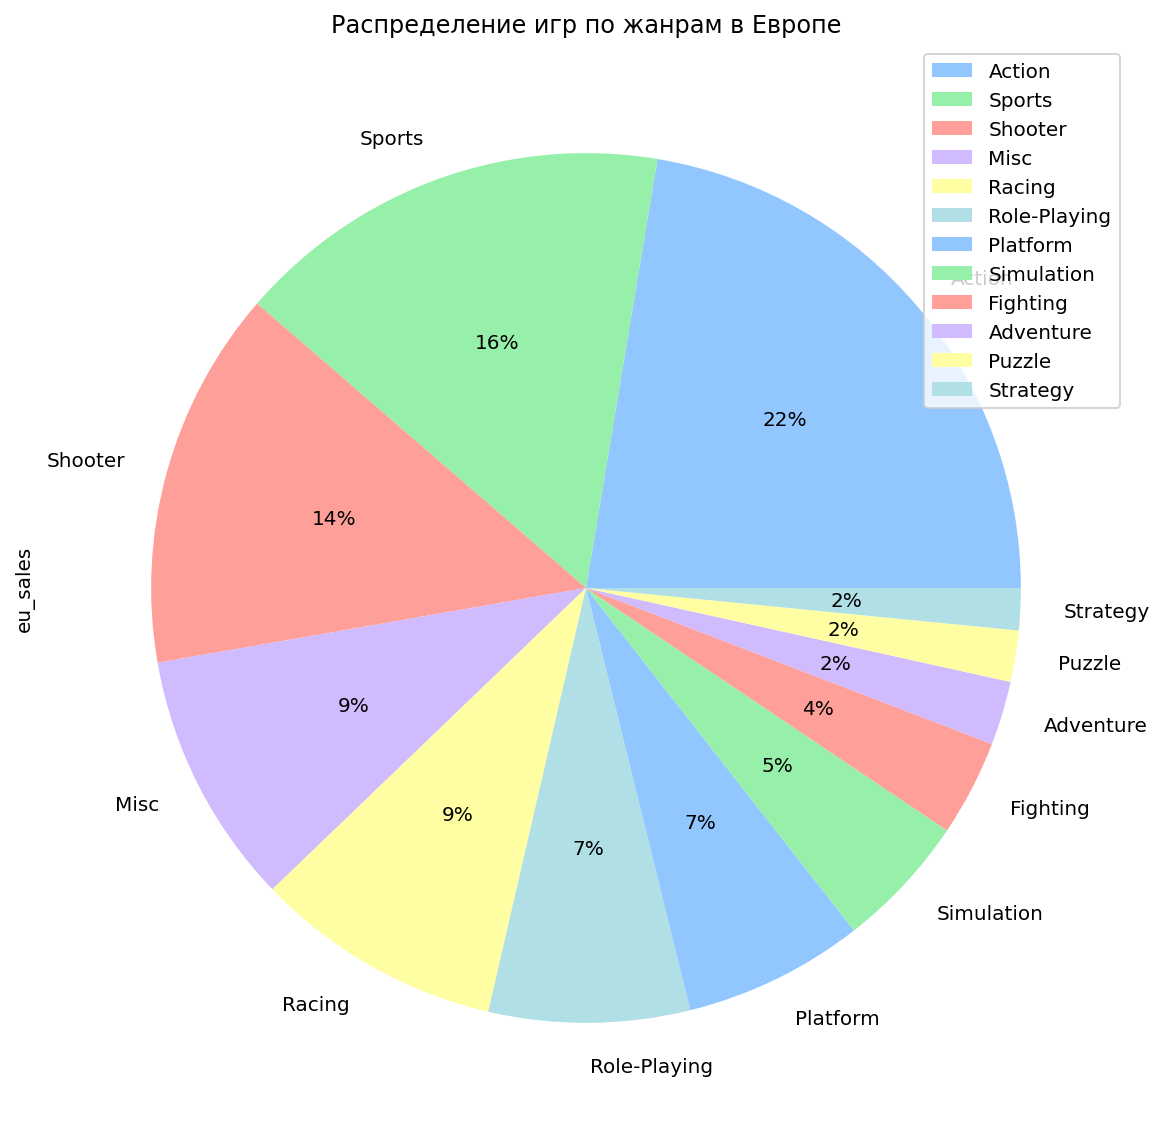

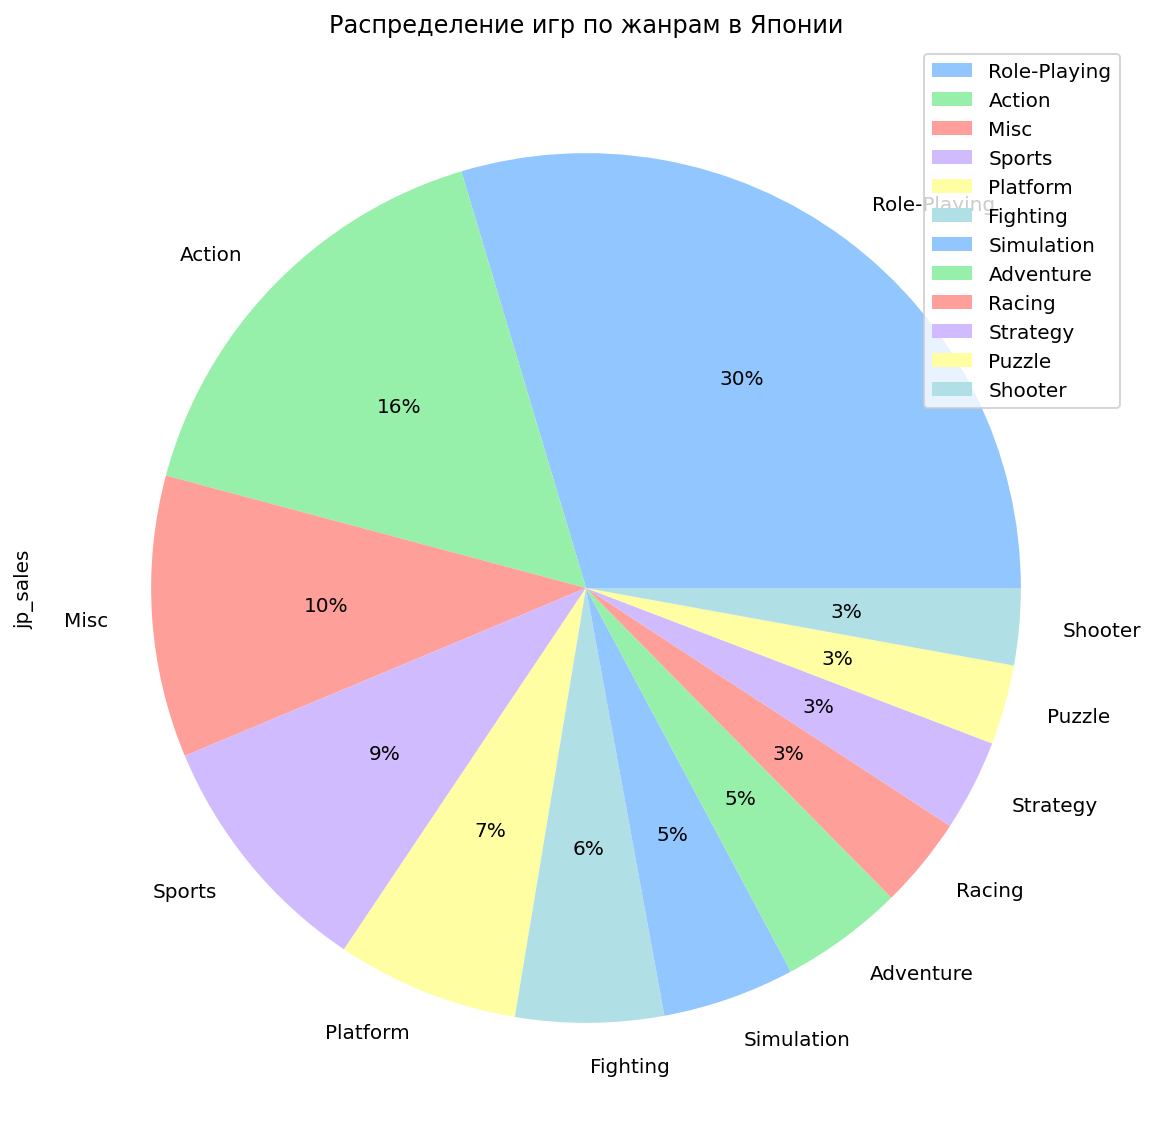

In [55]:
ax1 = na_genre_df_2000_chart.plot(kind='pie', autopct='%1.0f%%', subplots=True)
plt.title('Распределение игр по жанрам в Северной Америке')

ax2 = eu_genre_df_2000_chart.plot(kind='pie', autopct='%1.0f%%', subplots=True)
plt.title('Распределение игр по жанрам в Европе')

ax3 = jp_genre_df_2000_chart.plot(kind='pie', autopct='%1.0f%%', subplots=True)
plt.title('Распределение игр по жанрам в Японии');

Из графиков можно сделать следующие выводы:     
- Северная Америка Топ-5: Action, Sports, Shooter, Misc, Role-Playing;   
- Европа Топ-5: Action, Sports, Shooter, Misc, Racing;
- Япония Топ-5: Role-Playing, Action, Misc, Sports, Platform;   
Топы в Америка и Европе совпадают по составу (за исключением последнего, но 5-6 места совпадают). В этих же двух регионах примерно совпадают доли в распределении первых мест. Тенденция полностью свопадает с распределение платформ.    
В Японии же лидерство с уверенным отрывом захватывают ролевые игры, которые в других регионах занимают пятое-шестое место. И вновь ситуация повторяется с распределением платформ.

In [32]:
na_rating_df_2000 = df_2000.loc[:, ['na_sales', 'rating']]
na_rating_df_2000_chart = na_rating_df_2000.pivot_table(index='rating', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending = False)
eu_rating_df_2000 = df_2000.loc[:, ['rating', 'eu_sales']]
eu_rating_df_2000_chart = eu_rating_df_2000.pivot_table(index='rating', values= 'eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending = False)
jp_rating_df_2000 = df_2000.loc[:, ['rating', 'jp_sales']]
jp_rating_df_2000_chart = jp_rating_df_2000.pivot_table(index='rating', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending = False)

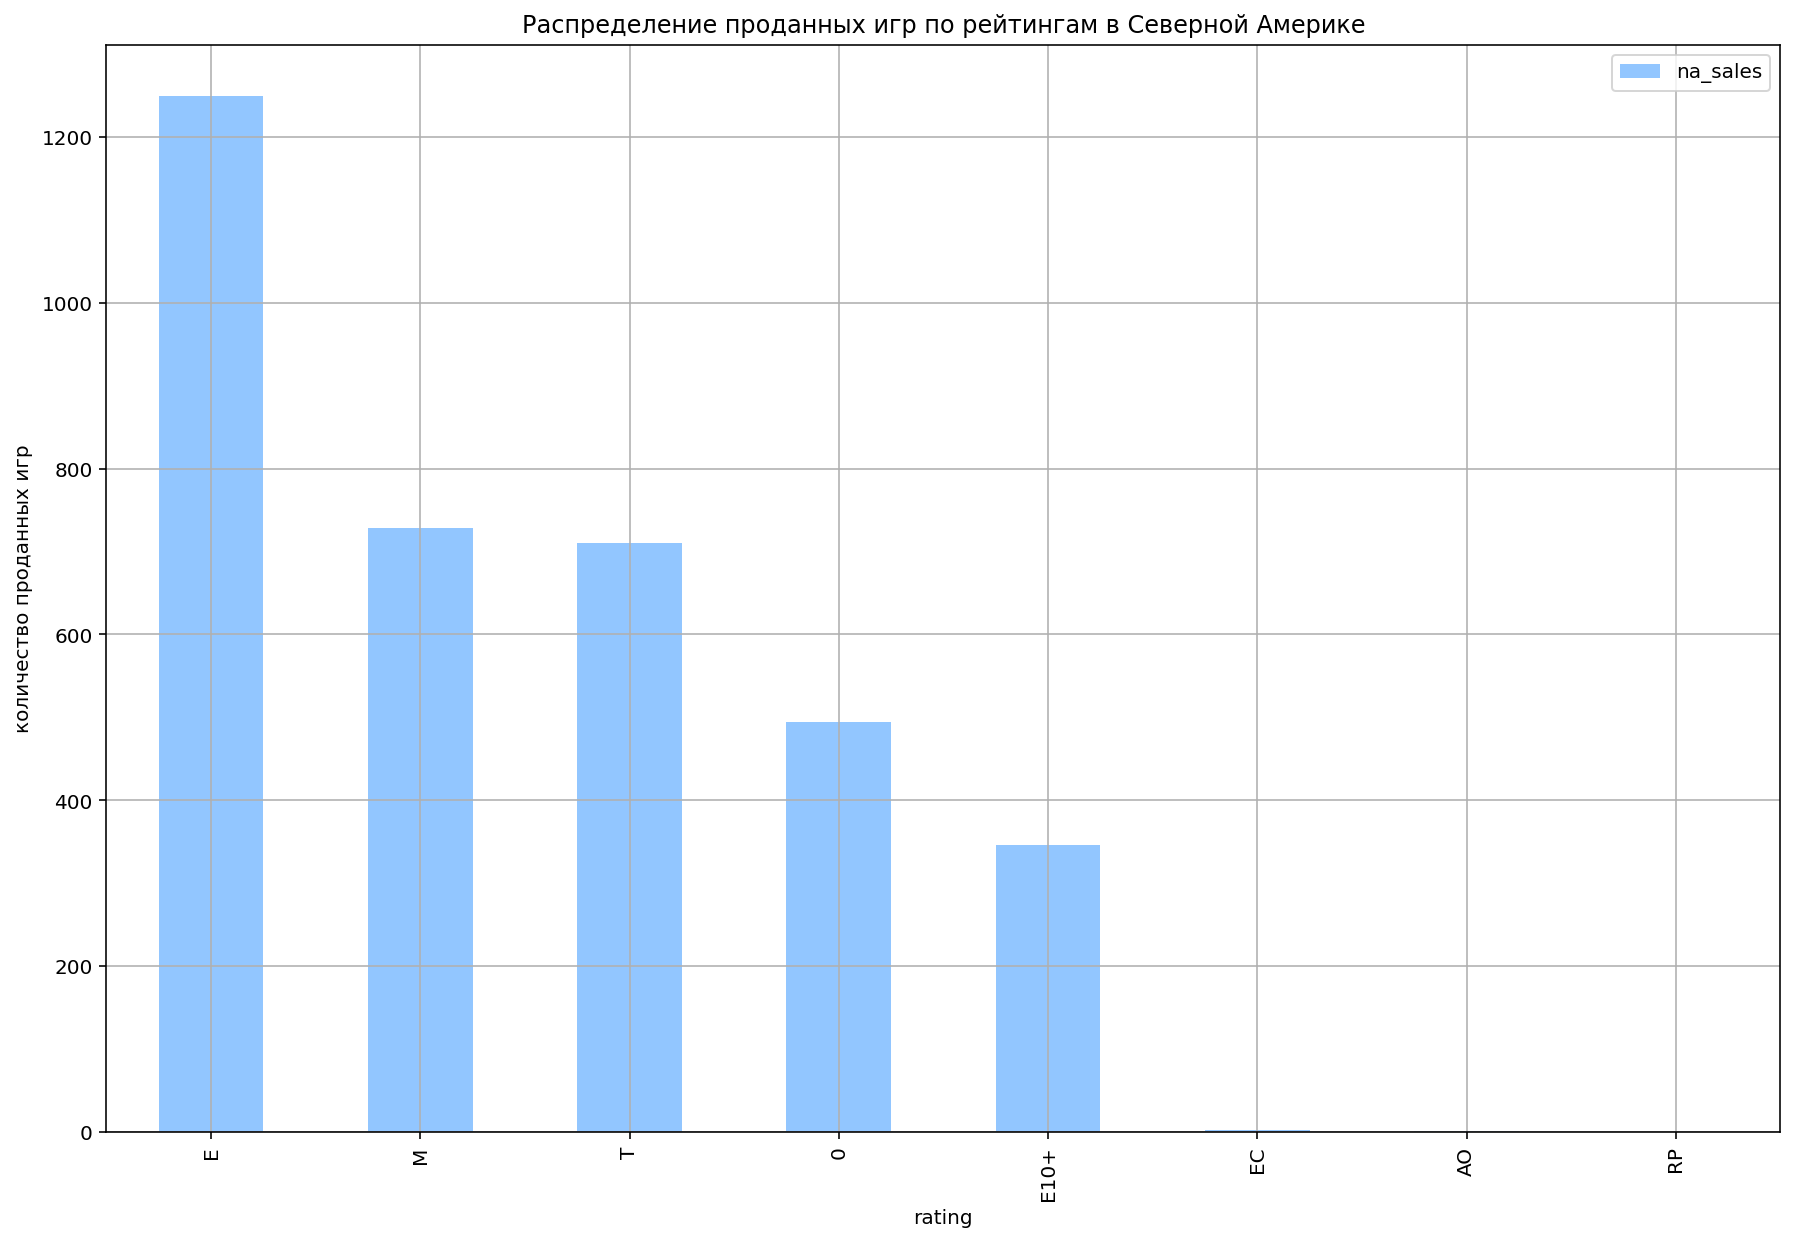

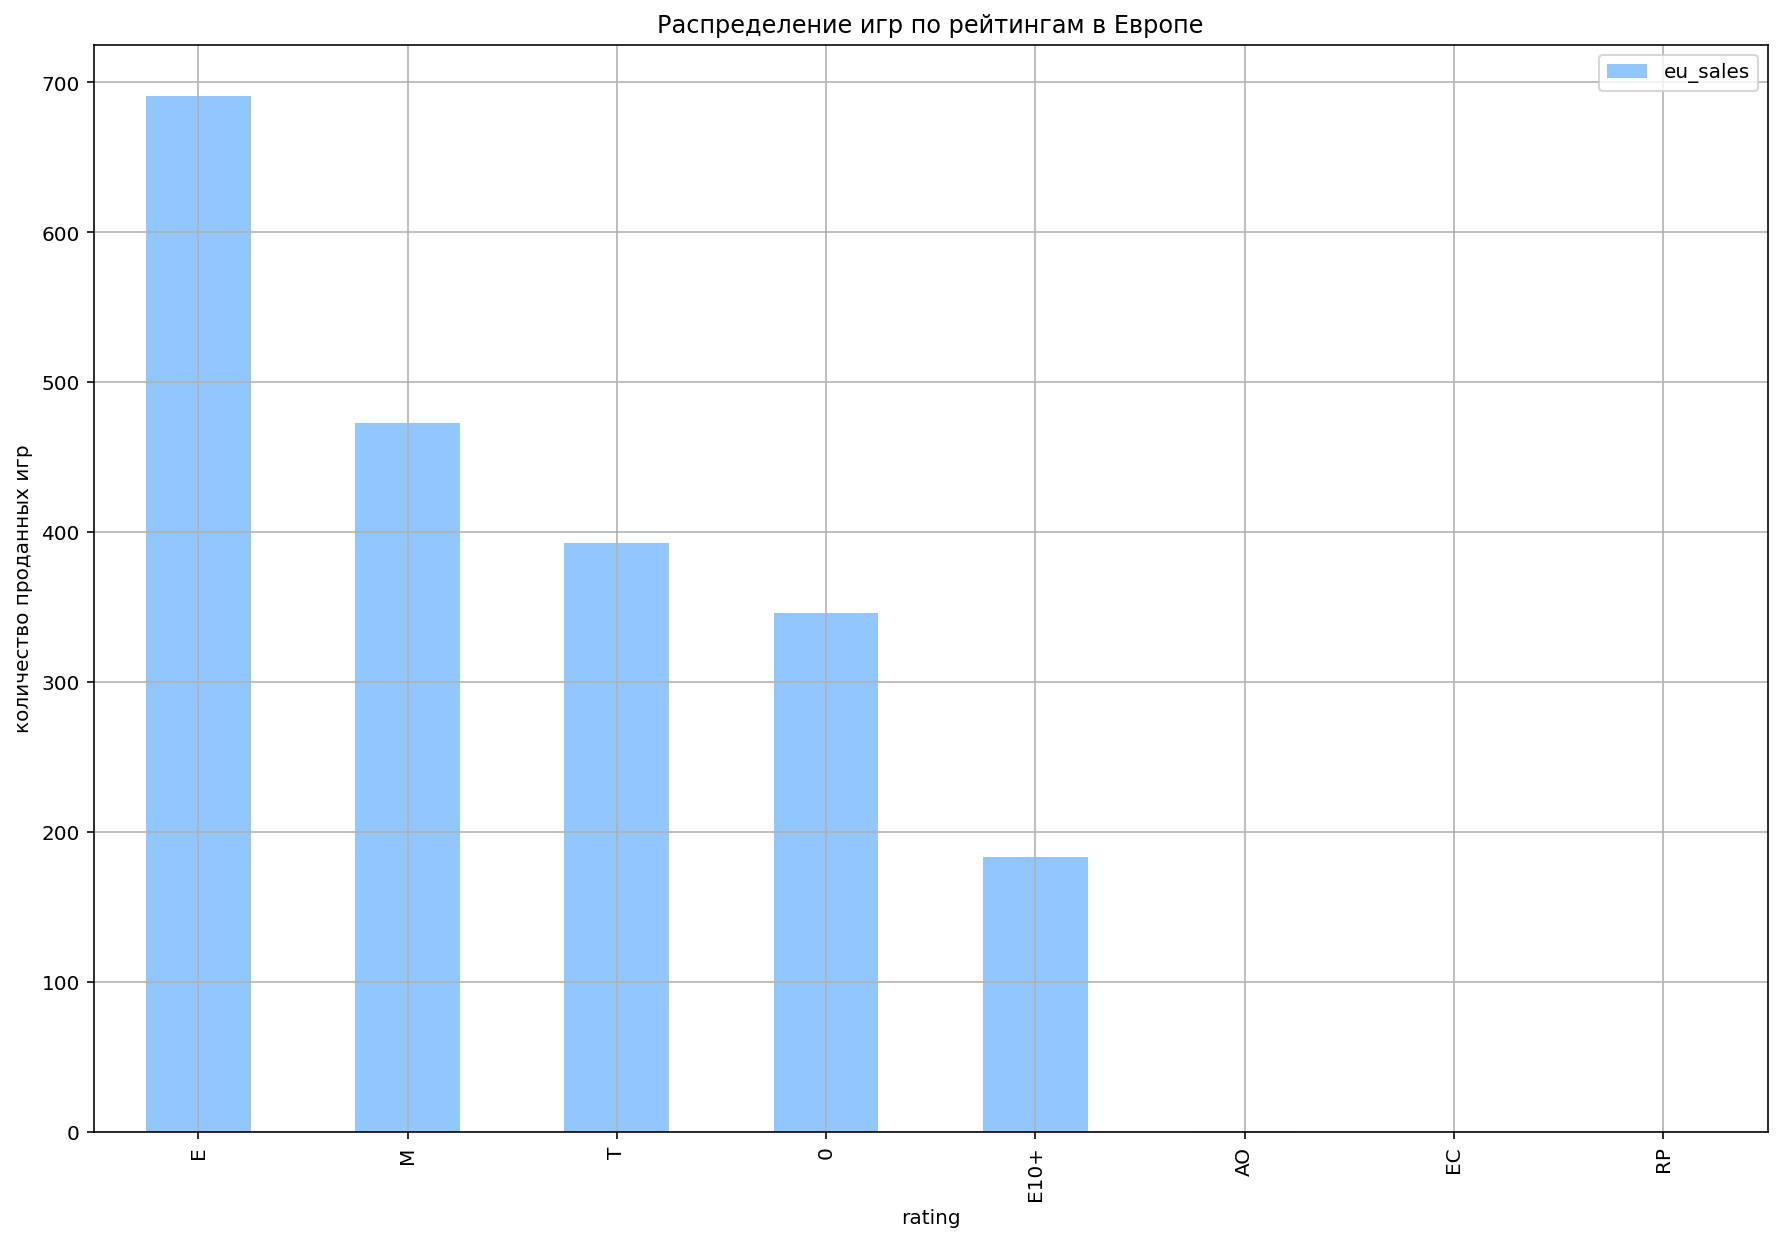

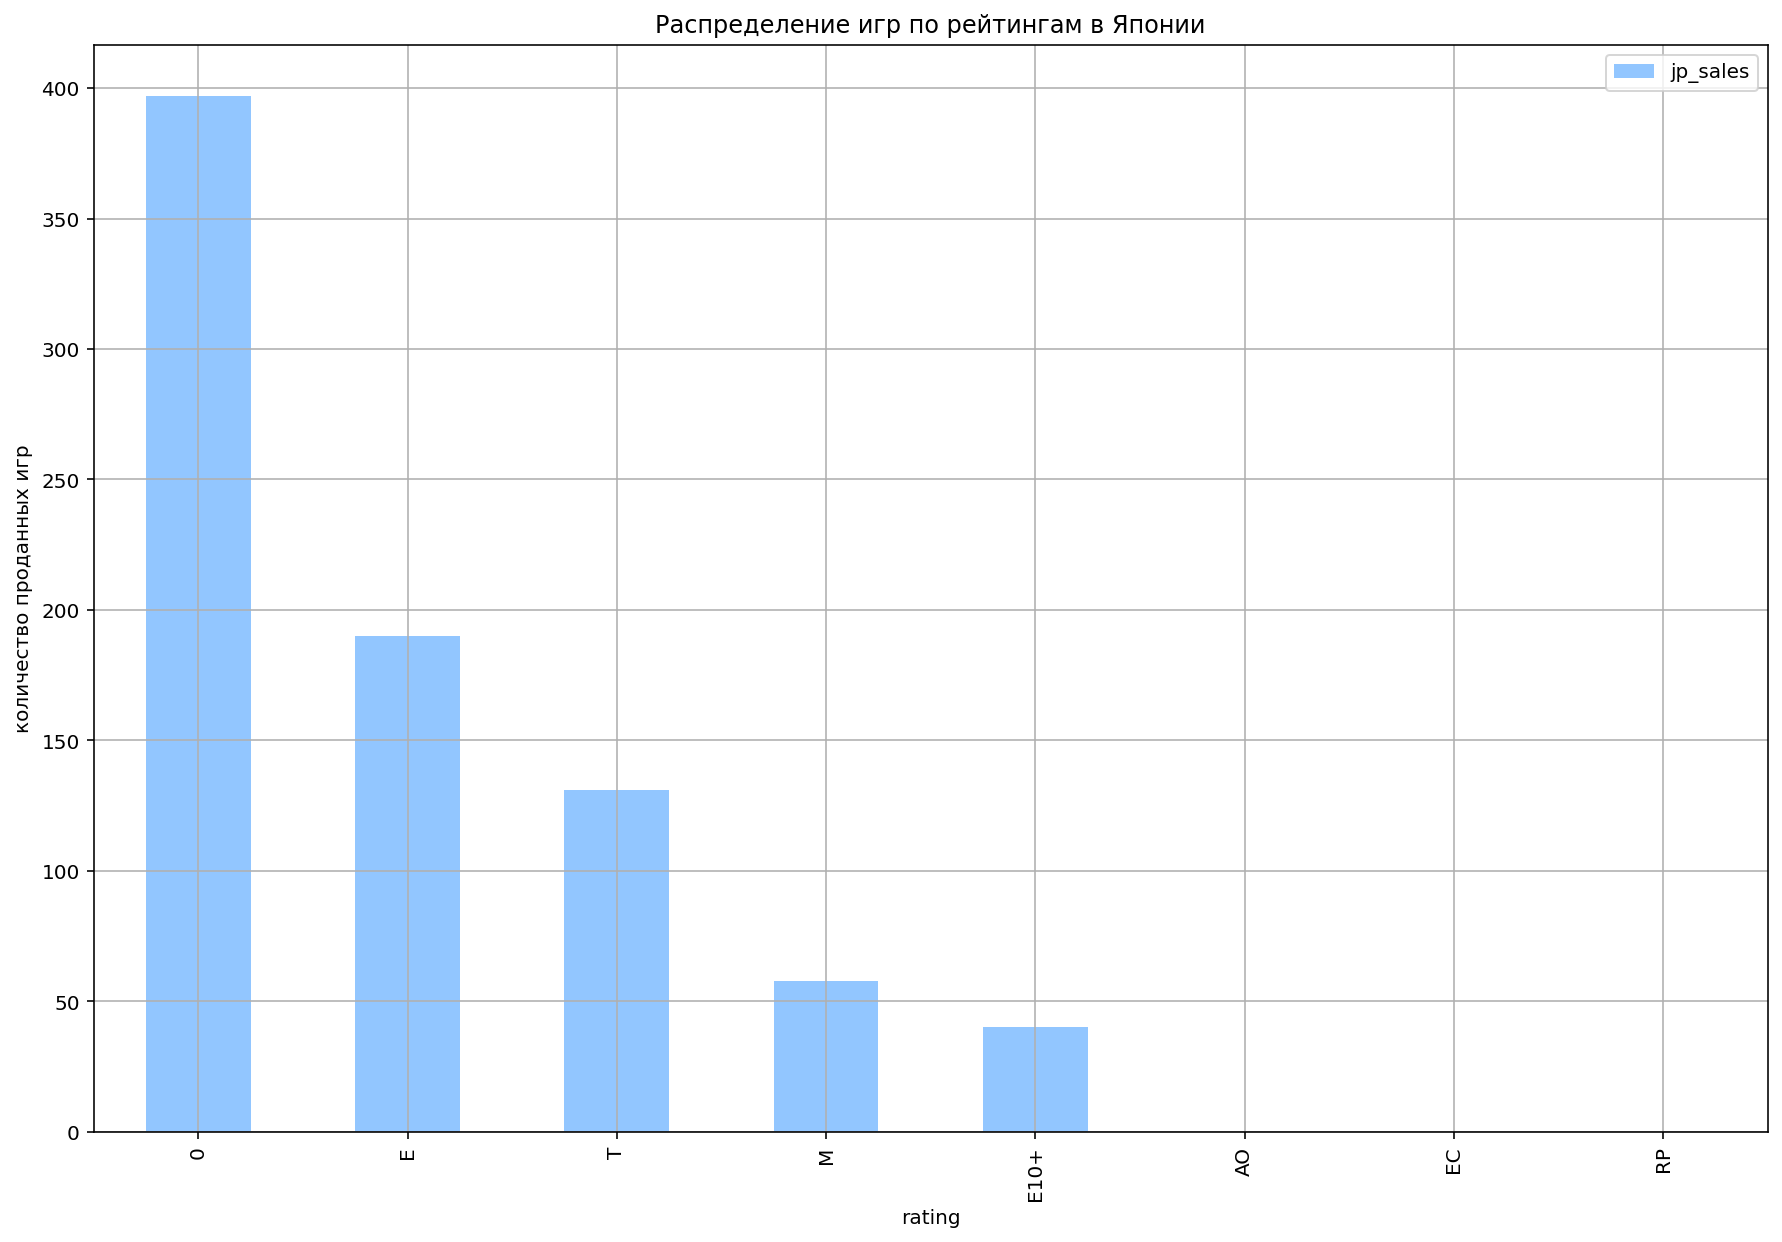

In [70]:
ax1 = na_rating_df_2000_chart.plot(kind='bar', grid=True)
plt.title('Распределение проданных игр по рейтингам в Северной Америке')
plt.ylabel('количество проданных игр')

ax2 = eu_rating_df_2000_chart.plot(kind='bar', grid=True)
plt.title('Распределение игр по рейтингам в Европе')
plt.ylabel('количество проданных игр')

ax3 = jp_rating_df_2000_chart.plot(kind='bar', grid=True)
plt.title('Распределение игр по рейтингам в Японии')
plt.ylabel('количество проданных игр');

Для упрощения расширфорвки добавим в текст расшифровку ESRB:  
«EC» («Early childhood») — «Для детей младшего возраста»  
«E» («Everyone») — «Для всех»   
«E10+» («Everyone 10 and older») — «Для всех старше 10 лет»   
«T» («Teen») — «Подросткам»  
«M» («Mature») — «От 17 лет»  
«AO» («Adults Only 18+») — «Только для взрослых»  
«RP» («Rating Pending»") — «Рейтинг ожидается»

Выводы из графика: 
- Северная Америка Топ-3: E, M, T;   
- Европа Топ-5: E, M, T;
- Япония Топ-5: E, T, M;   
Северная Америка и Европа вновь совпадают. И в этом случае первое место с Японией совпадают. Что логично: самые прибыльные игры в категории "Для всех". В Японии лидируют с большим отрывом игры для подростков.

*Итак, портрет пользователя каждого региона*   
Северная Америка: играет на платформе X360 в жанре Action в игру категории "Для всех".   
Европа: играет на платформе PS2 в жанре Action в игру в категории "Для всех".   
Япония: играет на платформе DS в жанре Role-Playing в категории "Для всех".

**Часть 4. Проверка гипотез**
<a id='section_4'></a>

*Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.*   
   
Нулевая гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC равны.   
   
Альтернативная гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC не равны.

Количество 247
Дисперсия 9.683


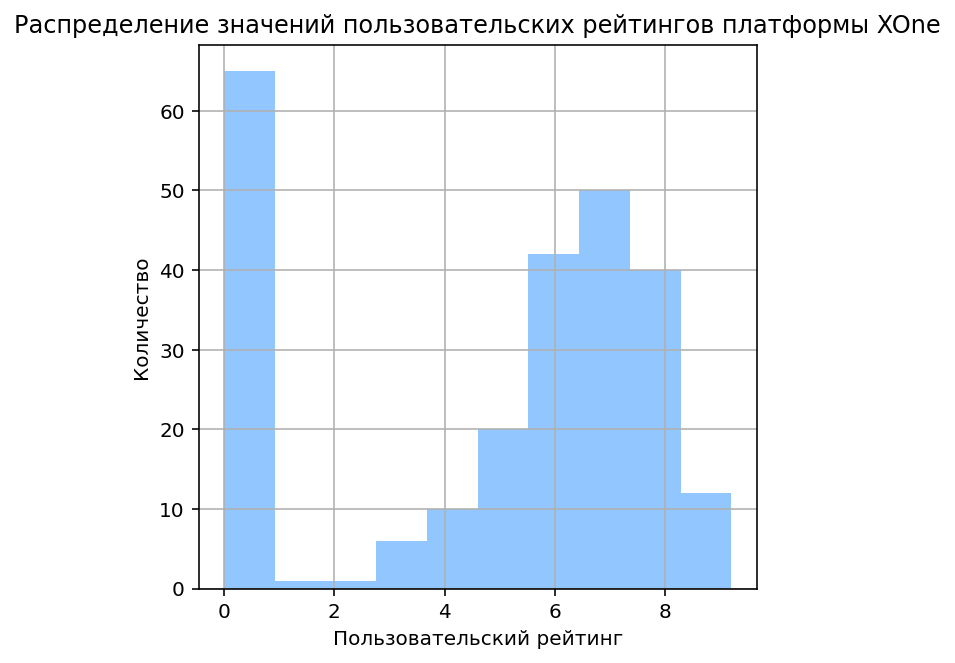

In [79]:
df_2000_xone = df_2000.query('platform == "XOne"')
print('Количество', df_2000_xone['user_score'].count())
print('Дисперсия', round(np.var(df_2000_xone['user_score'], ddof=1), 3))
plt.figure(figsize=(5,5))
df_2000_xone['user_score'].hist()
plt.title('Распределение значений пользовательских рейтингов платформы XOne')
plt.xlabel('Пользовательский рейтинг')
plt.ylabel('Количество');

Количество 917
Дисперсия= 9.764


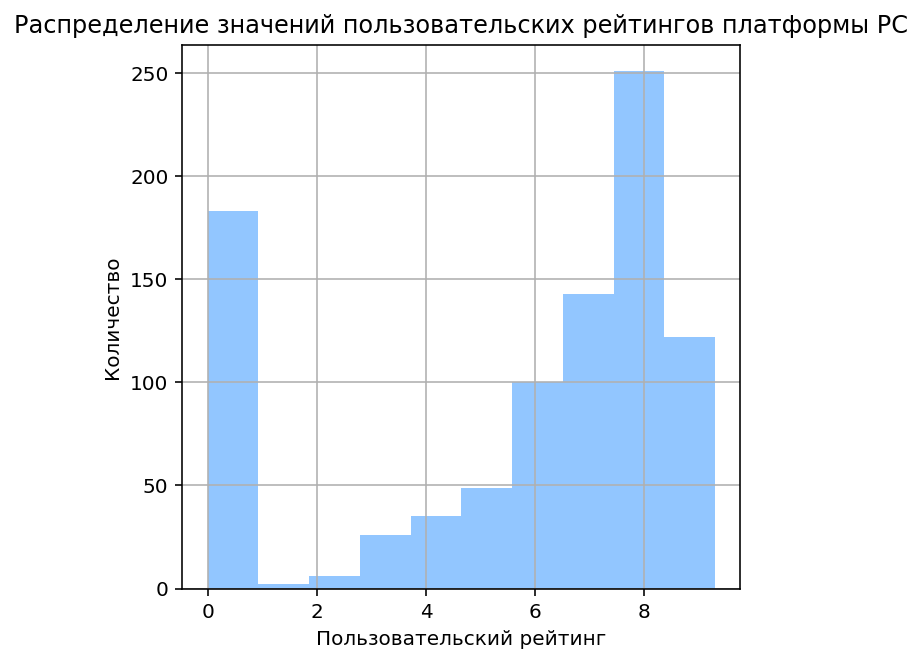

In [80]:
df_2000_pc = df_2000.query('platform == "PC"')
print('Количество', df_2000_pc['user_score'].count())
print('Дисперсия=', round(np.var(df_2000_pc['user_score'], ddof=1), 3))
plt.figure(figsize=(5,5))
df_2000_pc['user_score'].hist()
plt.title('Распределение значений пользовательских рейтингов платформы PC')
plt.xlabel('Пользовательский рейтинг')
plt.ylabel('Количество');

In [36]:
alpha = .05

results = st.ttest_ind(
    df_2000_xone['user_score'],
    df_2000_pc['user_score'],
    equal_var=False)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение:  0.00025105212860247885
Отвергаем нулевую гипотезу


Средние пользовательские рейтинги платформ Xbox One и PC не равны.

*Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.*   
   
Нулевая гипотеза: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») равны.   
   
Альтернативная гипотеза: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») не равны.

In [81]:
df_2000_action = df_2000.query('genre == "Action"')
print('Количество', df_2000_action['user_score'].count())
print('Дисперсия=', round(np.var(df_2000_action['user_score'], ddof=1), 3)
plt.figure(figsize=(5,5))
df_2000_action['user_score'].hist()
plt.title('Распределение значений пользовательских рейтингов жанра Action')
plt.xlabel('Пользовательский рейтинг')
plt.ylabel('Количество');

SyntaxError: invalid syntax (666288675.py, line 4)

Количество 1979
Дисперсия= 13.403


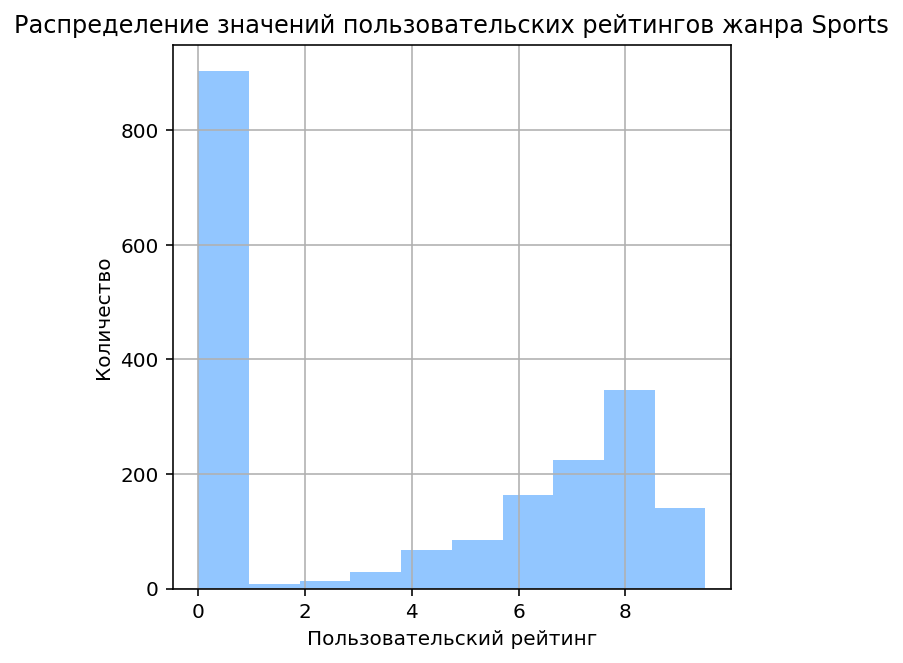

In [82]:
df_2000_sports = df_2000.query('genre == "Sports"')
print('Количество', df_2000_sports['user_score'].count())
print('Дисперсия=', round(np.var(df_2000_sports['user_score'], ddof=1), 3))
plt.figure(figsize=(5,5))
df_2000_sports['user_score'].hist()
plt.title('Распределение значений пользовательских рейтингов жанра Sports')
plt.xlabel('Пользовательский рейтинг')
plt.ylabel('Количество');

In [39]:
alpha = .05

results = st.ttest_ind(
    df_2000_action['user_score'],
    df_2000_sports['user_score'],
    equal_var=False)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение:  0.006371422938790112
Отвергаем нулевую гипотезу


Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») не равны.

**Часть 5. Общий вывод**
<a id='section_5'></a>

По показателям 2008 года рынку компьютерных игр есть куда расти.   
Согласно исследованиям средний срок жизненного цикла платформы на рынке 9-10 лет. Первый релиз PS4 был в 2013 году, из чего следует, что и в 2017 её не стоит сбрасывать со счетов.   
Также на пик своей продуктивности может в ближайшее время выйти XOne (данные за 2016 год могут быть неполными, а к 2015 году была тенденция к росту).   
У компаний WiiU и PSV нет тенденций к росту к 2015 году, поэтому нужно больше данных для вывода о перспективности этих компаний. Хотя исходя из теории 10-летнего жизненного цикла - эти платформы перспективны.  
На фоне результатов других платформ привлекательной выглядит 3DC. Эта платформа будет прибыльной ещё некоторое время, хотя пик уже пройден.   
Жанрами игр, к которым стоит пристальнее присмотреться: Action, Sports, Shooter, Misc, Role-Playing.   
Не найдена прямая зависимость между оценками пользователей и критиков и прибылью от продажи игр во всех регионах, поэтому нет необходимости крупных затрат на маркетинг в этой области.   
Стоит заметить, что тенденции отличаются в зависимости от региона деятельности. Поэтому на выбор траектории маркетинговой стратегии может влиять регион рынка сбыта, на который ориентируется наша компания. 